In [1]:
%load_ext autoreload

In [50]:
import random
import sys, os
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt



if not "../data_processing" in sys.path:
    sys.path.append("../data_processing")

%autoreload
import build_dataset
import dataframe_exploration

ROOT_PATH = os.path.abspath("..").split("data_processing")[0]
print("ROOT", ROOT_PATH)
module_path = os.path.abspath(os.path.join(ROOT_PATH+"/utils/"))
if module_path not in sys.path:
    print("appended")
    sys.path.append(module_path)

import functions as f

c, p = f.color_palette()
sns.set(context='paper', style='whitegrid', palette=np.array(p))
print(ROOT_PATH)
plt.style.use('file://' + ROOT_PATH + "/utils/plotparams.rc")

ROOT /Users/mortenolsenosvik/Documents/NTNU/Master/master-thesis/src
/Users/mortenolsenosvik/Documents/NTNU/Master/master-thesis/src


In [3]:
wt_instance = build_dataset.wt_data.load_instance("WTG02",load_minimal=False)



Loading WTG02...
Loaded WTG02


In [4]:
# ----- Used to create and build a csv file of the data set -----


df = build_dataset.create_rms_datasets_for_one_component(wt_instance, 'GbxHssRr;0,0102;m/s2', 
                                                         power_threshold=0,plot=False, bins=50, 
                                                         plot_vertical_lines=False)

build_dataset.save_dataframe_to_csv(df, 'GbxHssRr_RMS_WTG02.csv')


"\ndf = build_dataset.create_rms_datasets_for_one_component(wt_instance, 'GbxHssRr;0,0102;m/s2', \n                                                         power_threshold=0,plot=False, bins=50, \n                                                         plot_vertical_lines=False)\n\nbuild_dataset.save_dataframe_to_csv(df, 'GbxHssRr_RMS_WTG02.csv')\n"

### Load data set from csv file

In [5]:
path = '/Volumes/OsvikExtra/VibrationData/RMS_dataset/GbxHssRr_RMS_power>2500_WTG02.csv'
data = pd.read_csv(path)
data.head()

AvgPower     ActPower  AvgRotSpeed  WindSpeed  NacelleDirection  \
0  2818.207520  3291.300049  1487.871218       14.2        226.699997   
1  2528.062988  2454.500000  1471.267571       10.6        231.699997   
2  2500.473145  1772.500000  1432.996560        8.4        284.600006   
3  2555.221924  2492.899902  1465.589029        9.0        132.000000   
4  3065.522217  3304.800049  1476.364735       12.7        245.000000   

   GbxHssRr_RMS_0  GbxHssRr_RMS_1  GbxHssRr_RMS_2  GbxHssRr_RMS_3  \
0        0.404392        0.258909        0.811581        0.344739   
1        0.532580        0.244108        1.221325        0.346431   
2        0.478452        0.210531        1.090423        0.360744   
3        0.512141        0.226217        1.160659        0.358593   
4        0.386640        0.276154        1.027501        0.356752   

   GbxHssRr_RMS_4  ...  GbxHssRr_RMS_40  GbxHssRr_RMS_41  GbxHssRr_RMS_42  \
0        1.497359  ...         1.101426         1.969857         1.778854   
1        1.477624  ...         1.106000         2.131452         1.824046   
2        0.946055  ...         0.967446         1.962500         1.463750   
3        0.996903  ...         1.068143         2.376538         1.979047   
4        1.272245  ...         1.155076         1.865711         1.766413   

   GbxHssRr_RMS_43  GbxHssRr_RMS_44  GbxHssRr_RMS_45  GbxHssRr_RMS_46  \
0         2.673142         3.386242         2.750154         1.419267   
1         2.082840         2.086788         1.563331         0.788437   
2         1.369159         1.247210         1.092017         0.519553   
3         2.345064         2.218439         1.995184         0.850978   
4         2.519427         3.441490         2.888474         1.341962   

   GbxHssRr_RMS_47  GbxHssRr_RMS_48  GbxHssRr_RMS_49  
0         0.809299         0.444020         0.272188  
1         0.436628         0.294574         0.181487  
2         0.320830         0.221710         0.146560  
3         0.474515         0.348262         0.198423  
4         0.759380         0.538935         0.295528  

[5 rows x 55 columns]

### Correlation plot, unfiltered data set

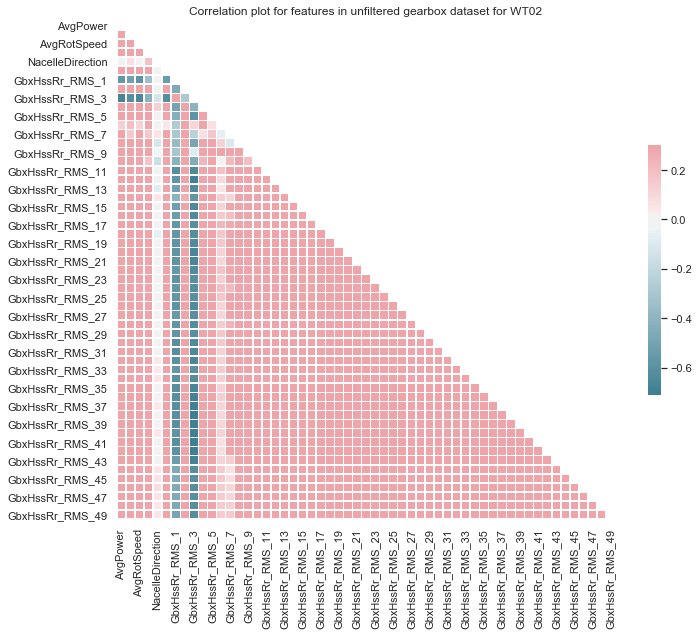

In [6]:
path = '/Volumes/OsvikExtra/VibrationData/RMS_dataset/GbxHssRr_RMS_WTG02.csv'
save_to_file_name = "Correlation_plot_wtg02_Gearbox"
plot_title = "Correlation plot for features in unfiltered gearbox dataset for WT02"

dataframe_exploration.create_save_correlation_plot(path, save_to_file_name, plot_title)

### Correlation plot, filtered data set

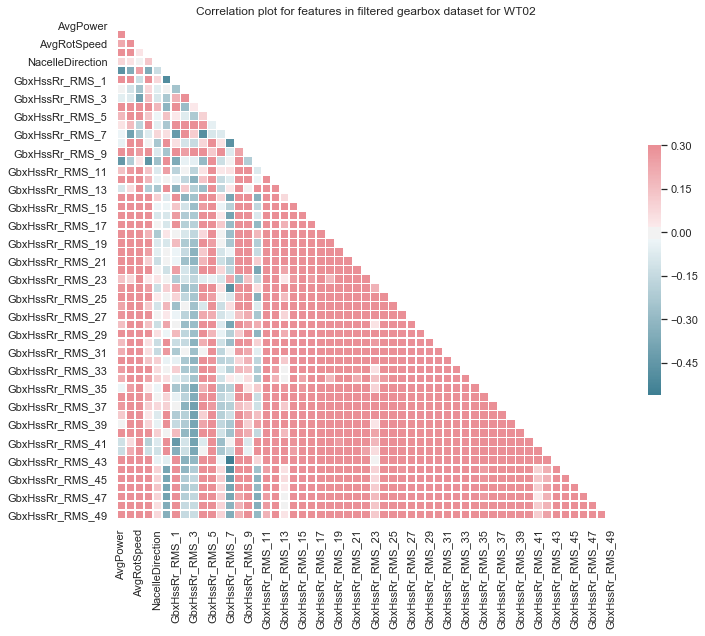

In [7]:
path = '/Volumes/OsvikExtra/VibrationData/RMS_dataset/GbxHssRr_RMS_power>2500_WTG02.csv'
save_to_file_name = "Correlation_plot_wtg02_Gearbox"
plot_title = "Correlation plot for features in filtered gearbox dataset for WT02"

dataframe_exploration.create_save_correlation_plot(path, save_to_file_name, plot_title)

## Plot average rot speed (high speed shaft) for all intervals with avg_power > 2500

color codes: 
red: hgih rot speed which gives high rms values in bin 5

yellow: low rot speeds which gives high rms values in bin 1,2 or 3. The first line at interval 30 (with very low 
rot speed) has only high rot speed in bin 1

light blue: high rot speed but regular rms values

green horisontal line: 1550 rpm (rotational speed)

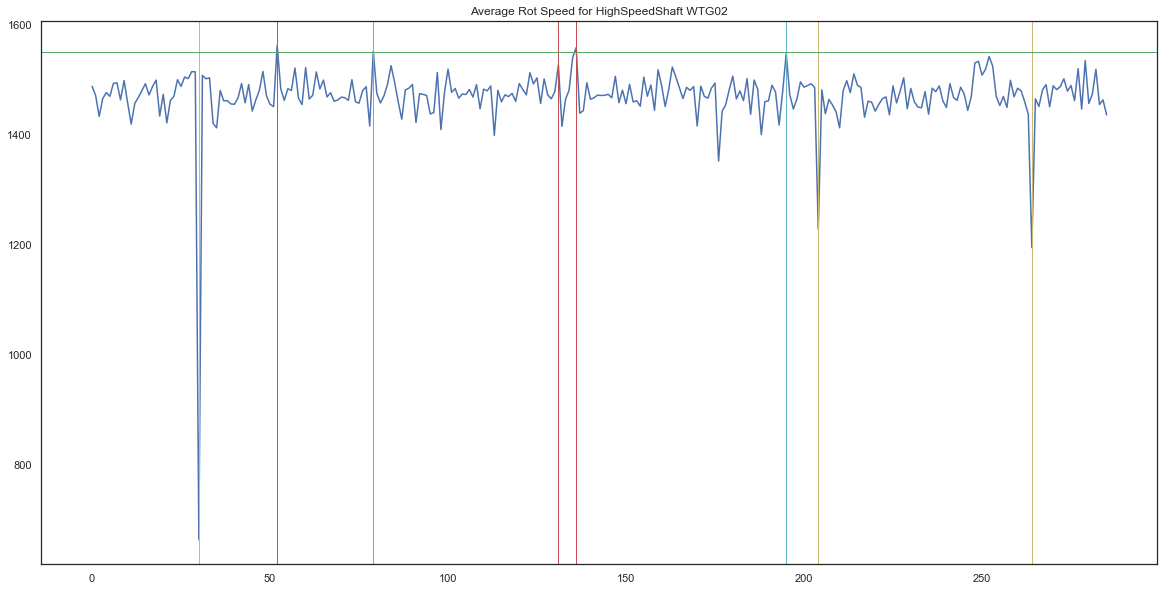

In [8]:
x = np.arange(data.shape[0])
y = data['AvgRotSpeed']
plt.figure(figsize=(20,10))
plt.title('Average Rot Speed for HighSpeedShaft WTG02')
plt.plot(x, y)
plt.axvline(x=30,  c='y', linewidth=1)
plt.axvline(x=52,  c='r', linewidth=1)
plt.axvline(x=79,  c='c', linewidth=1)
plt.axvline(x=131, c='r', linewidth=1)
plt.axvline(x=136, c='r', linewidth=1)
plt.axvline(x=195, c='c', linewidth=1)
plt.axvline(x=204, c='y', linewidth=1)
plt.axvline(x=264, c='y', linewidth=1)
plt.axhline(y=1550, c='g', linewidth=1)
plt.show()

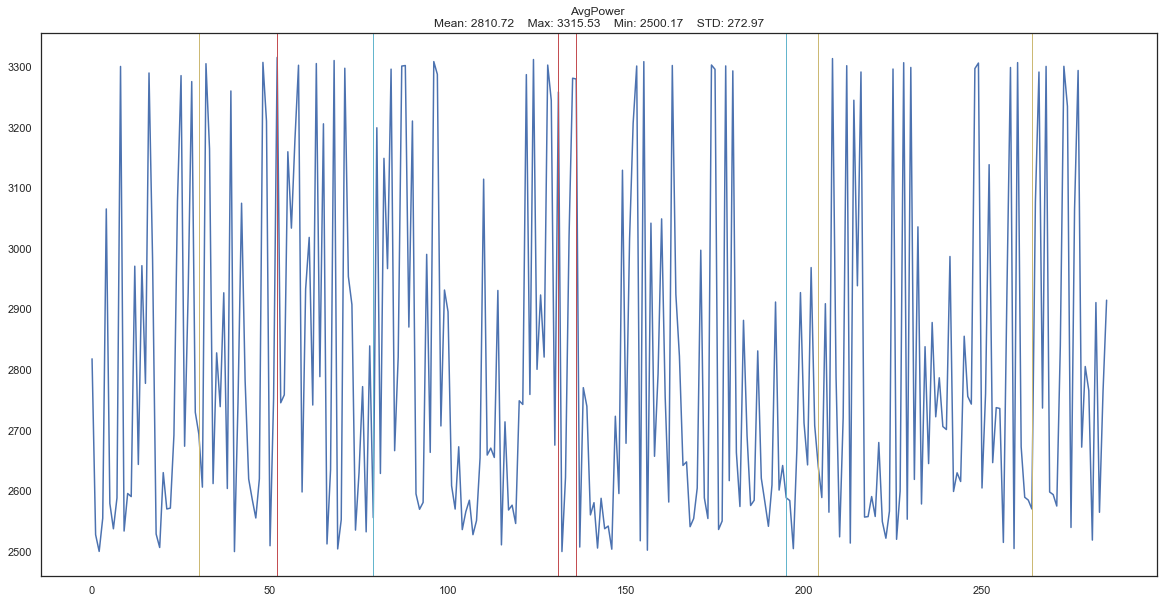

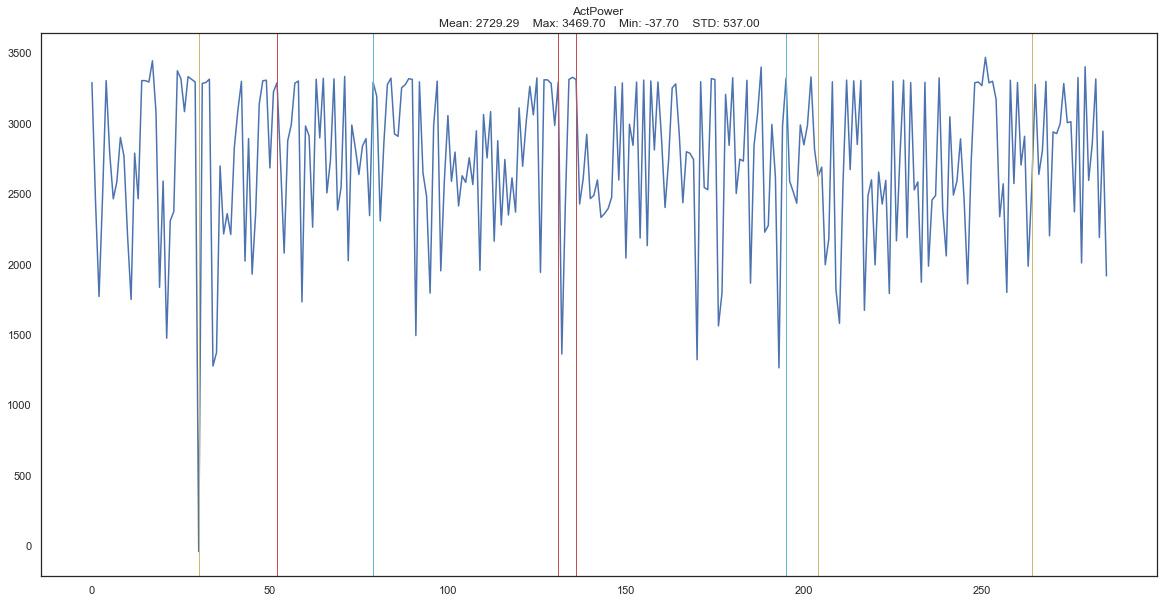

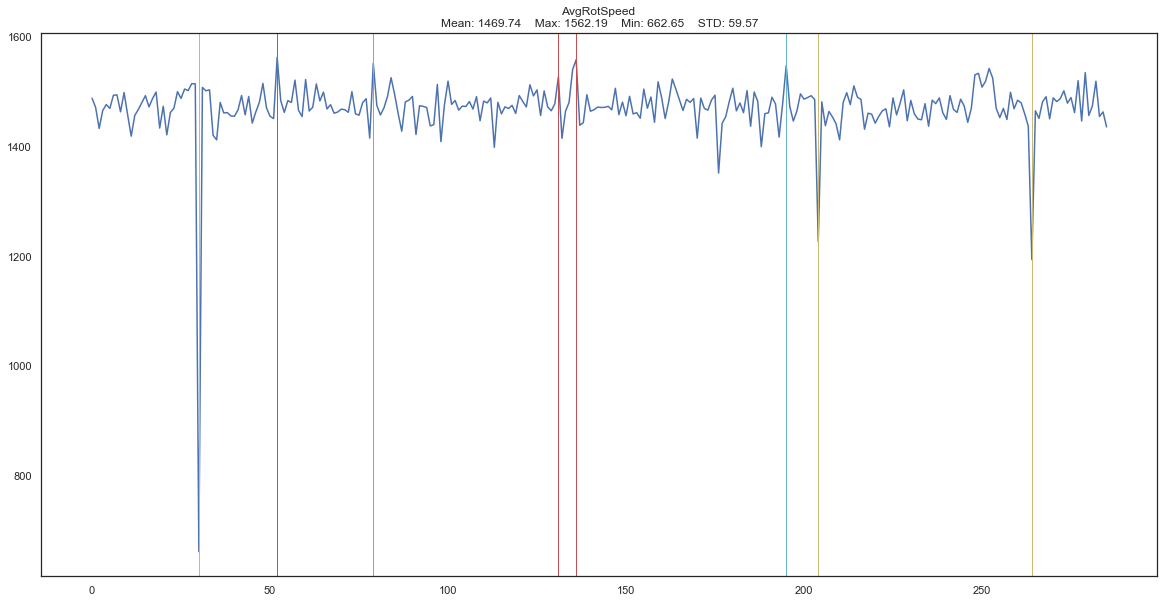

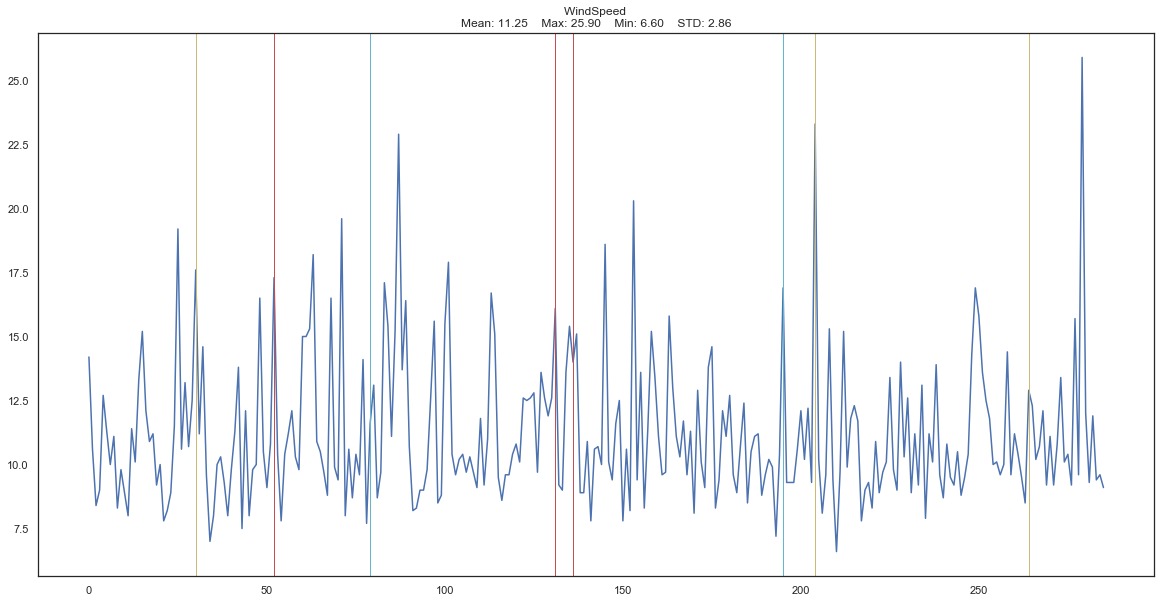

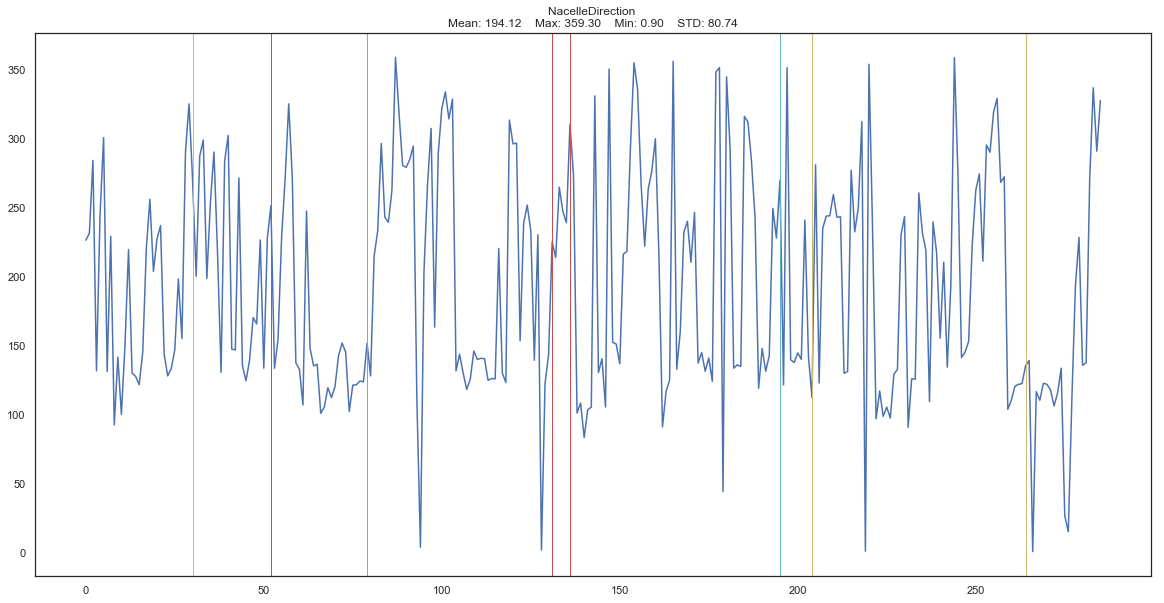

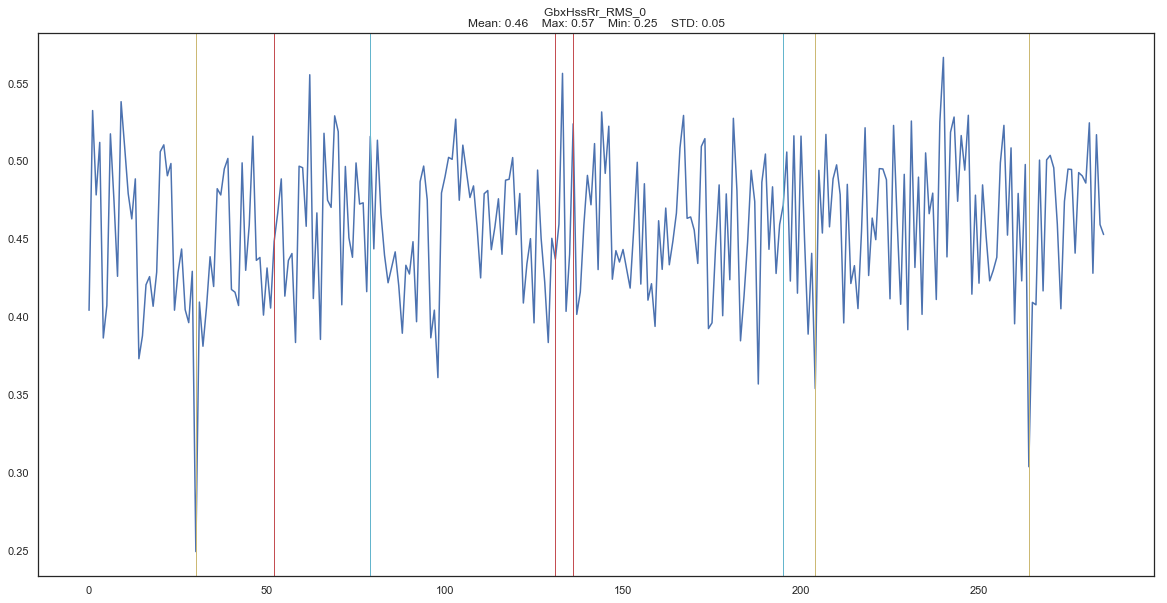

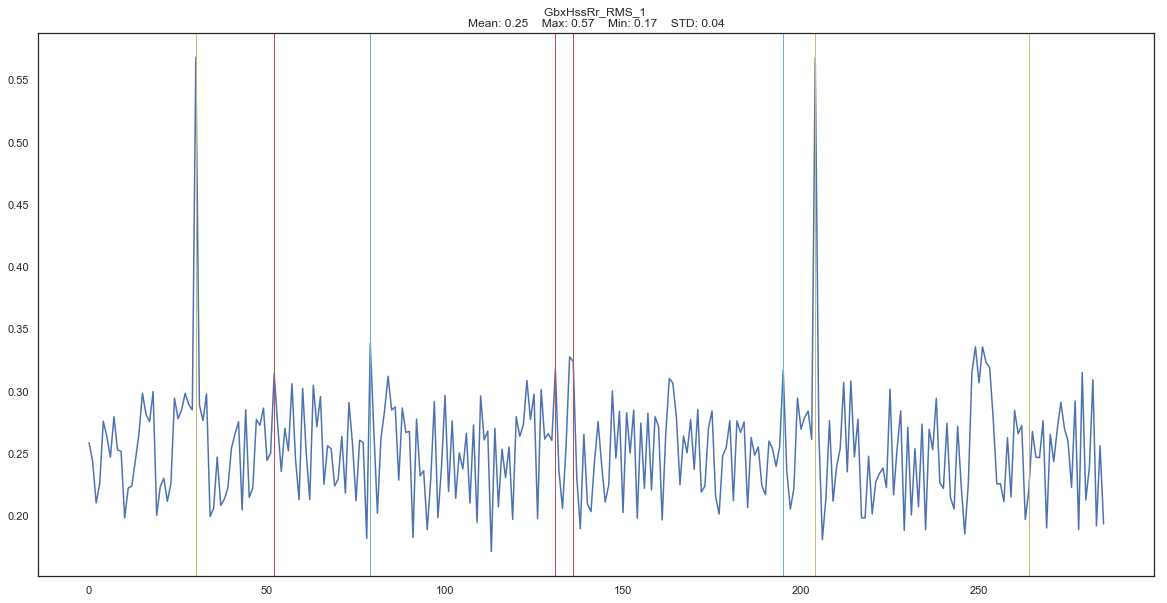

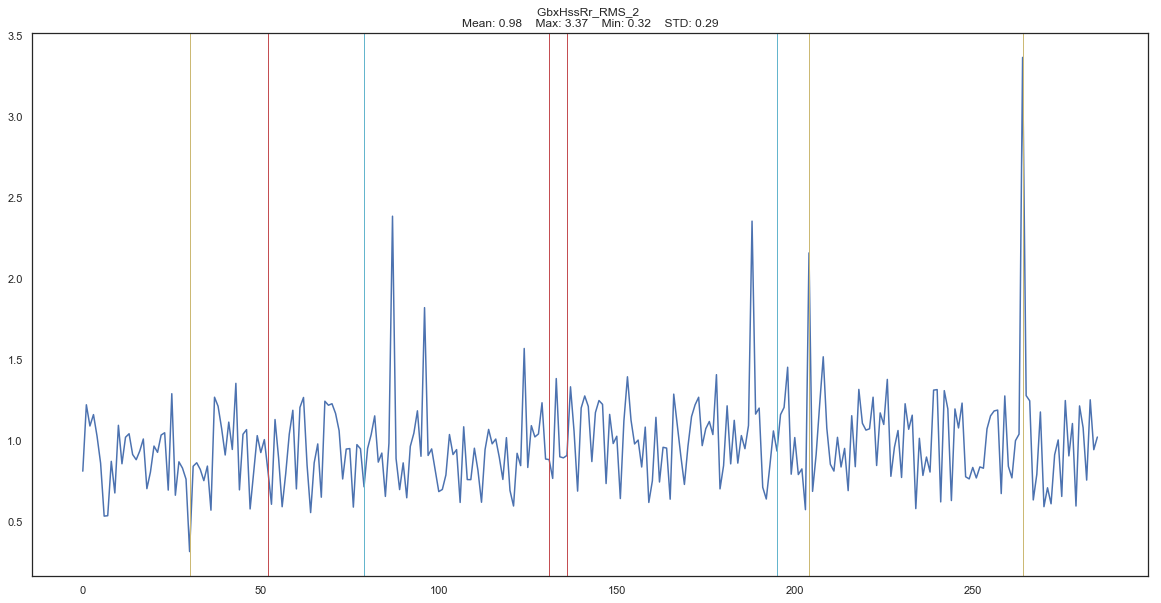

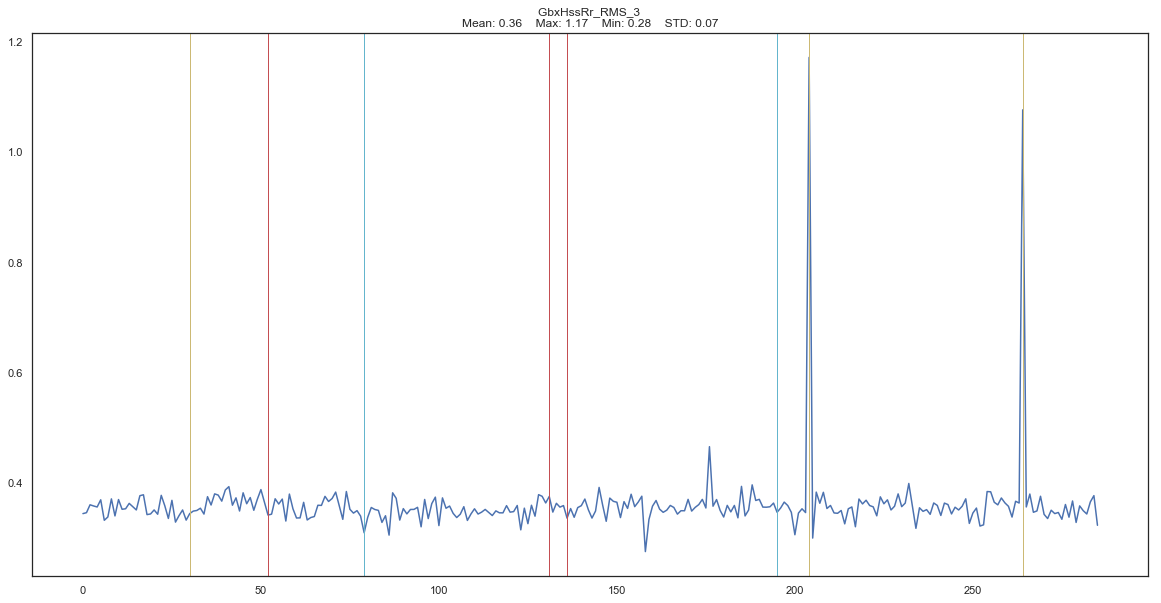

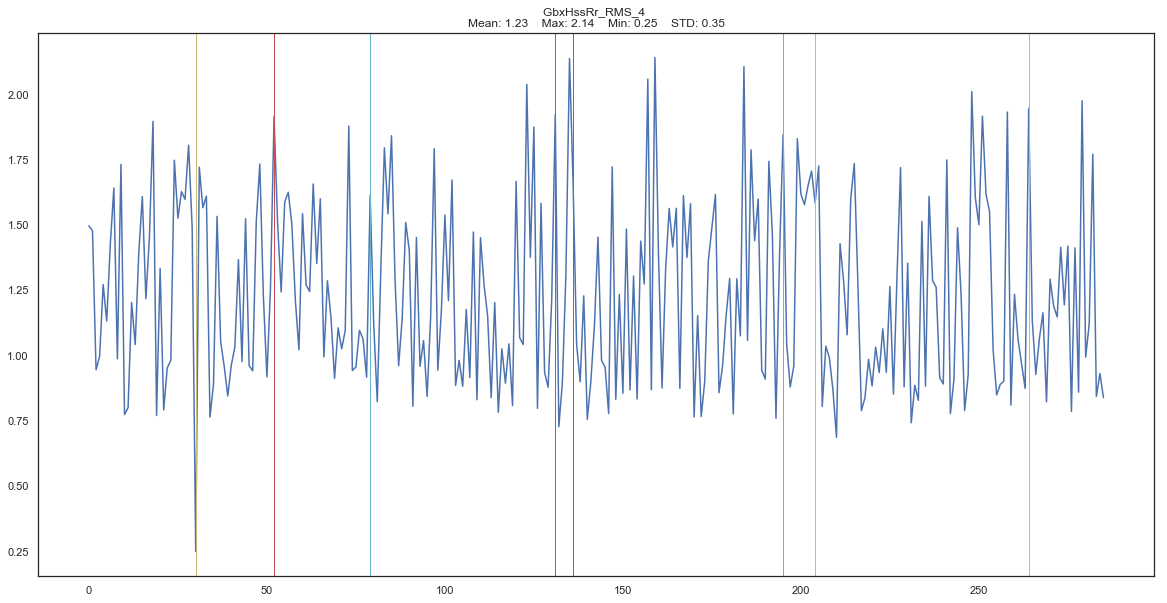

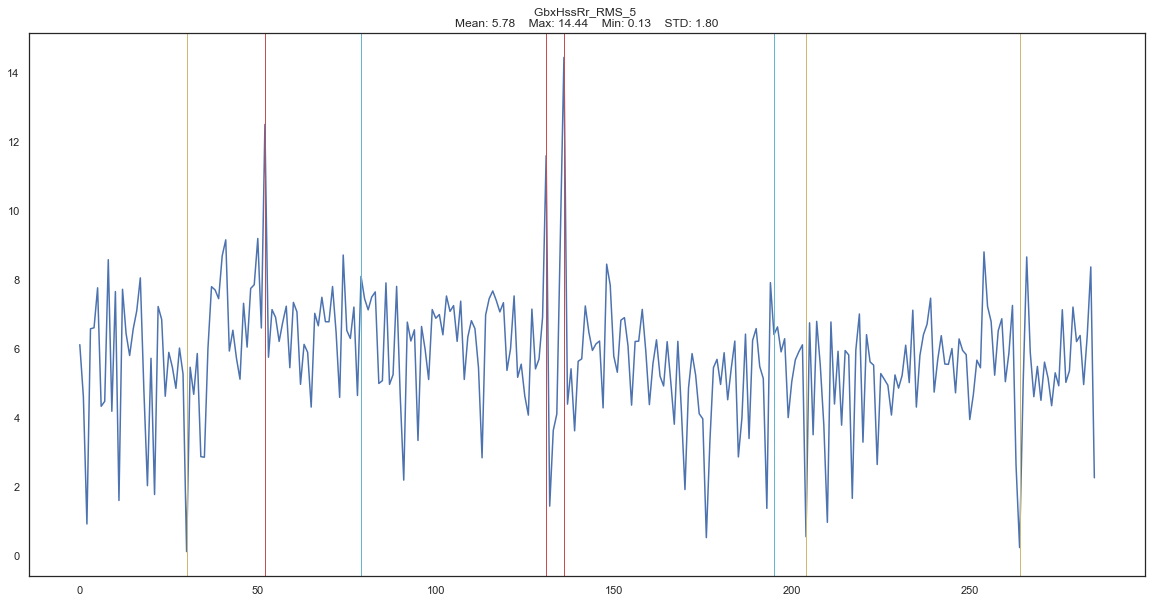

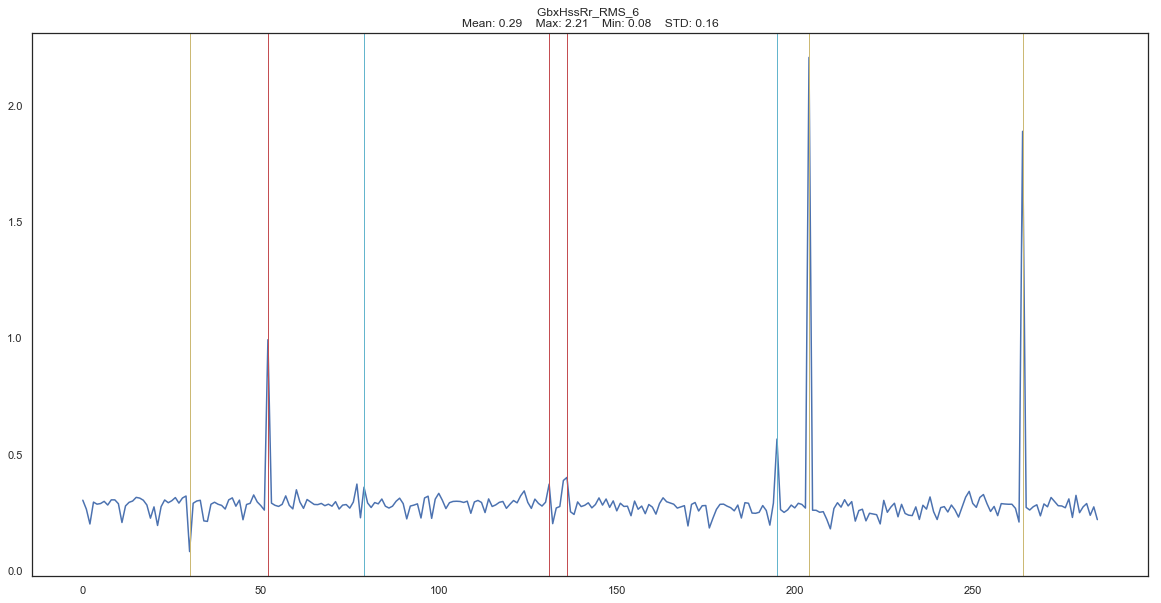

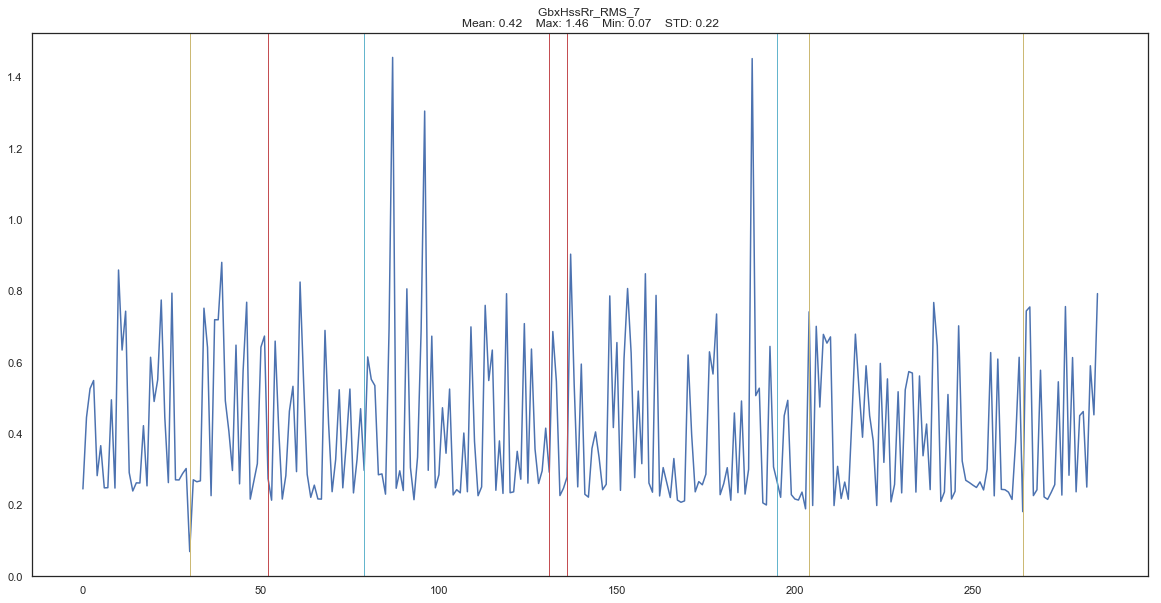

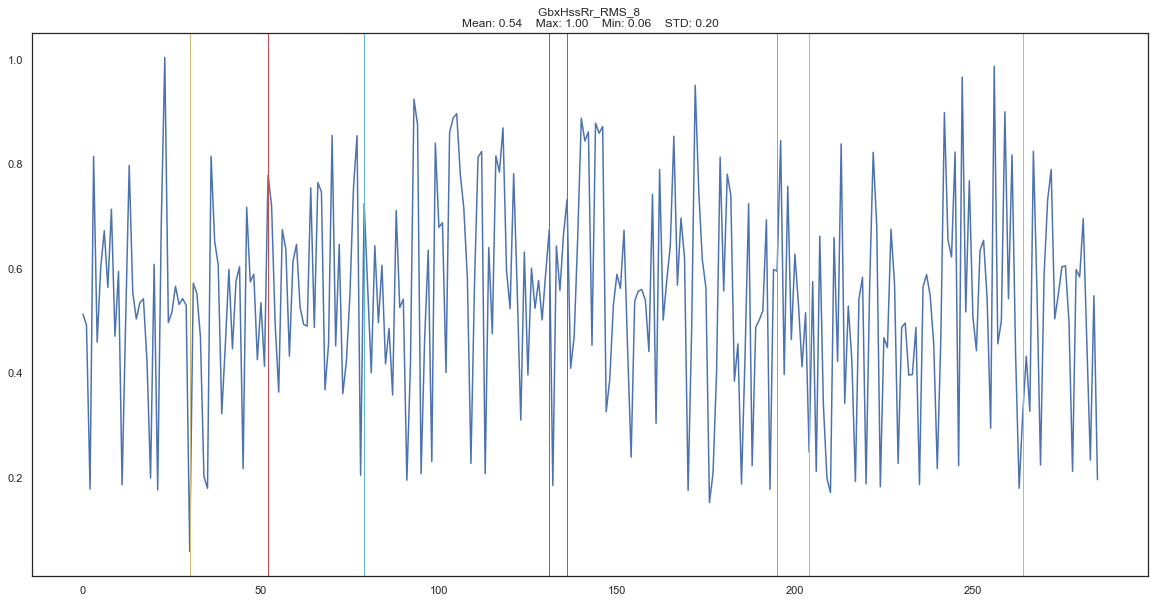

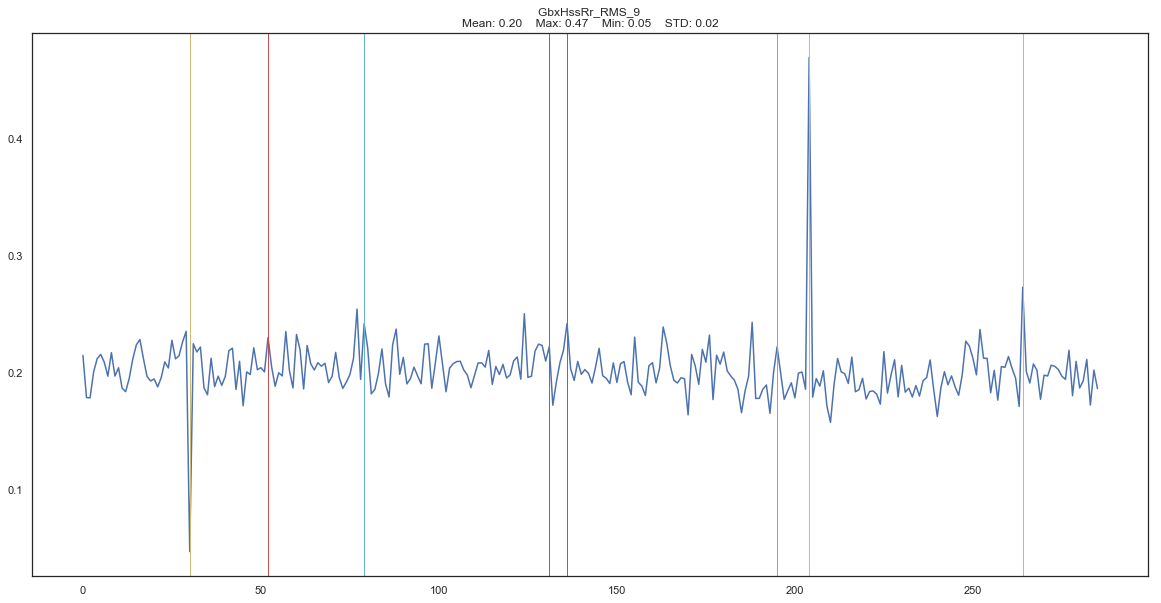

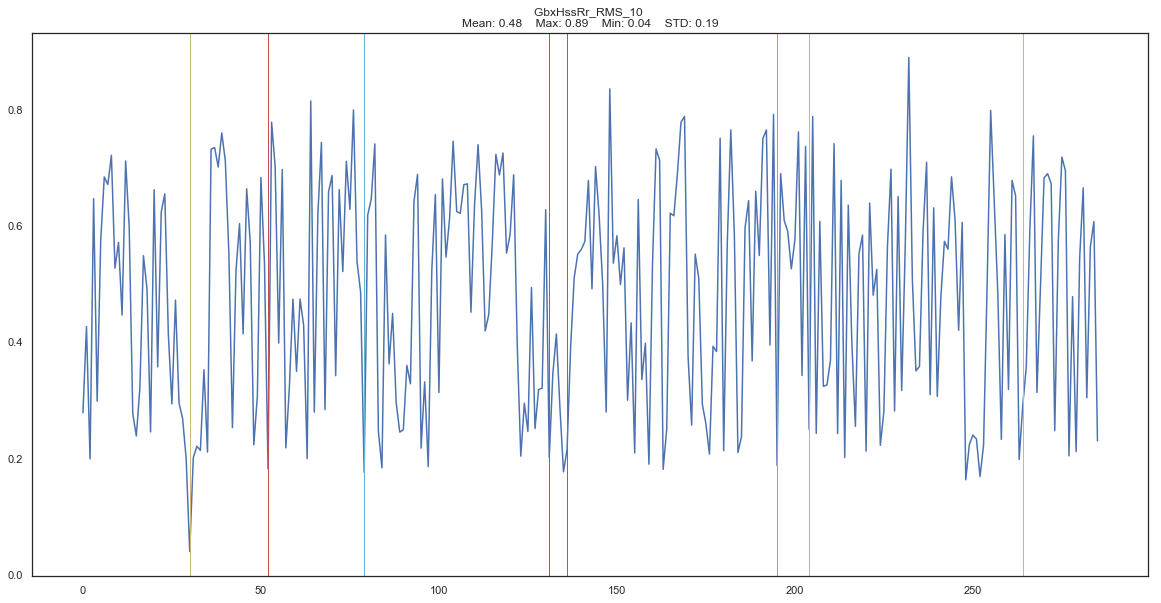

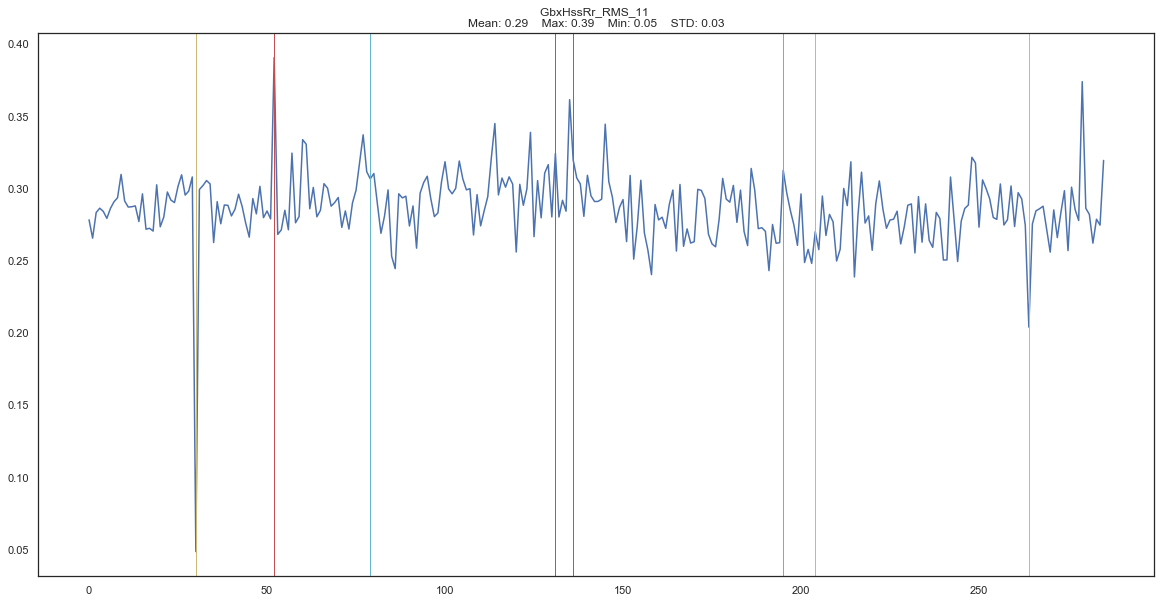

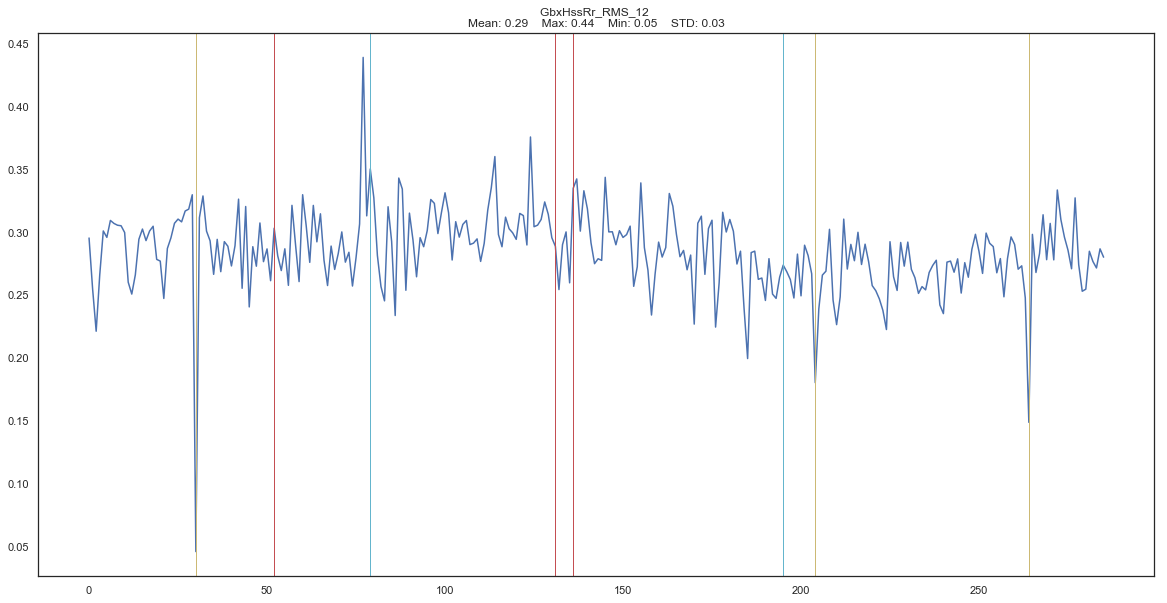

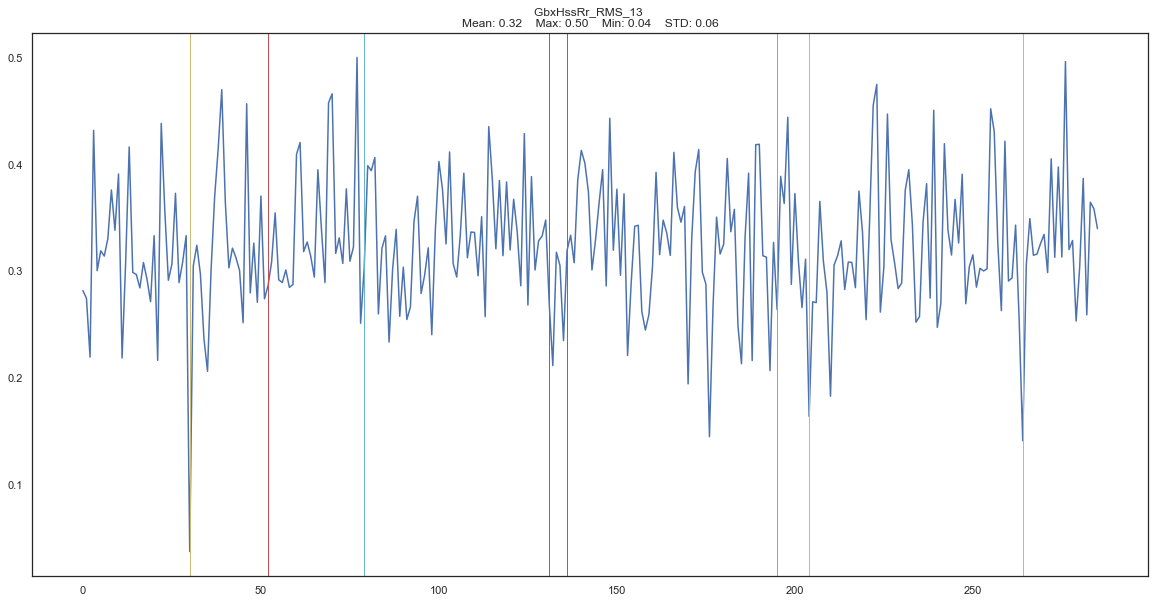

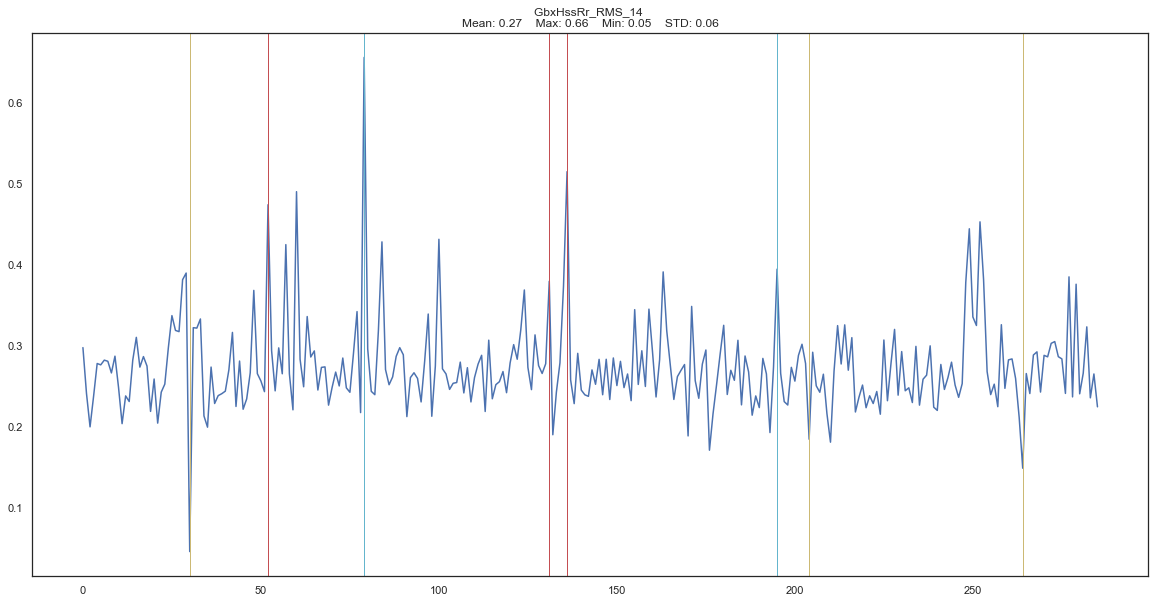

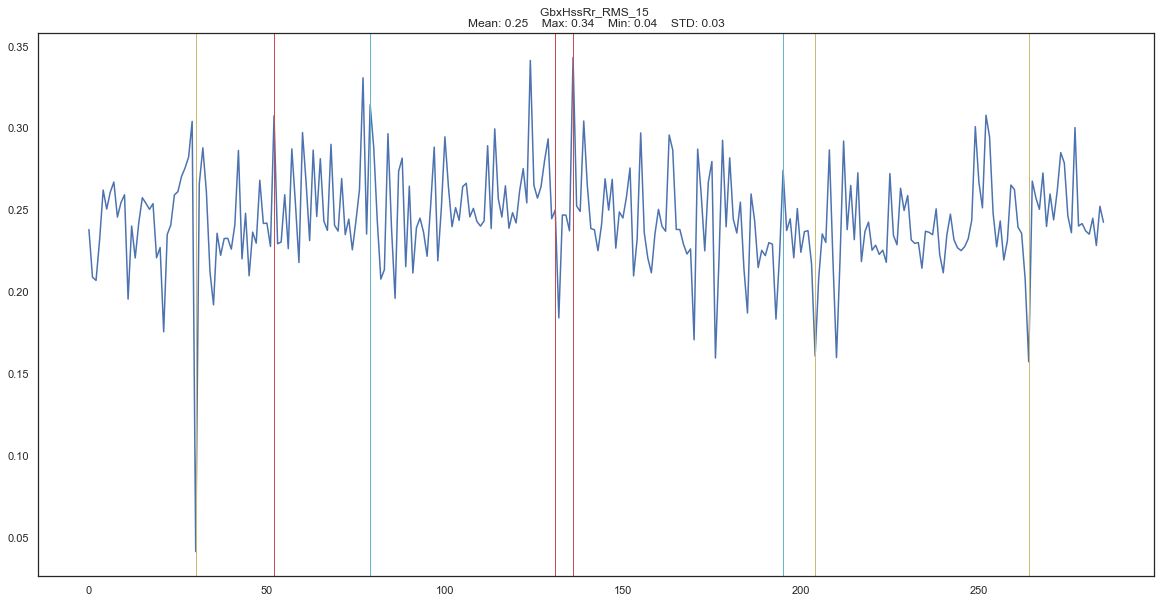

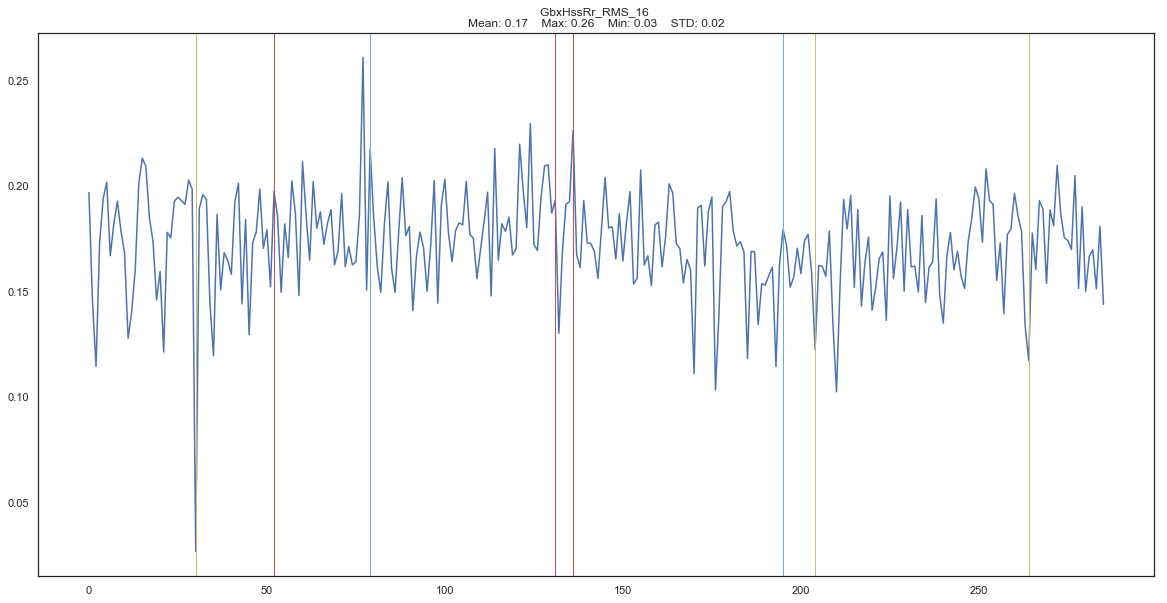

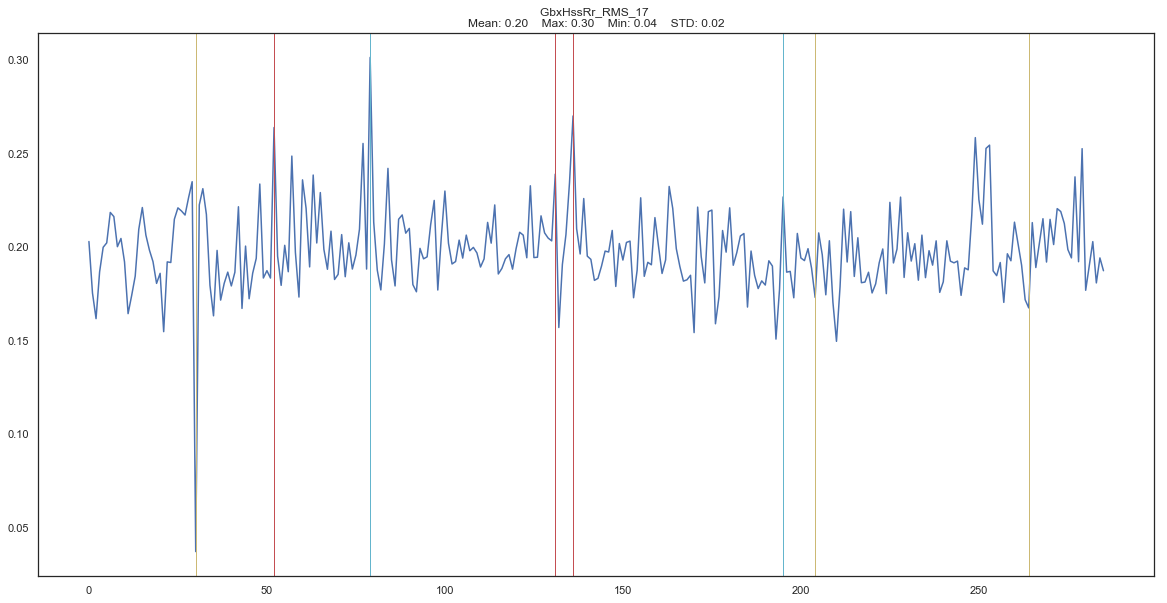

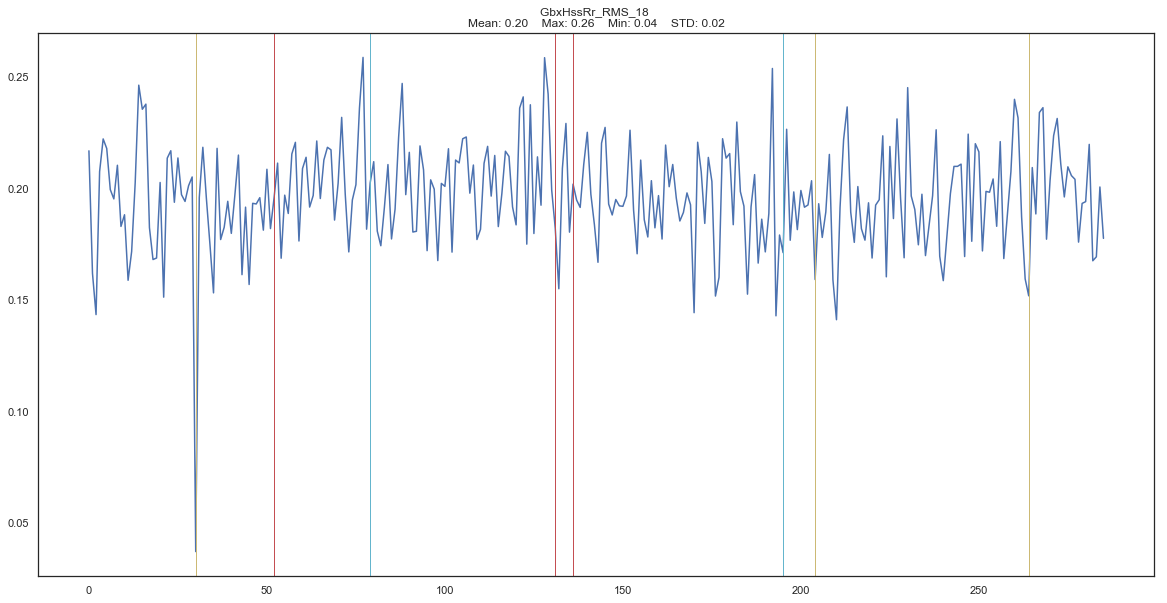

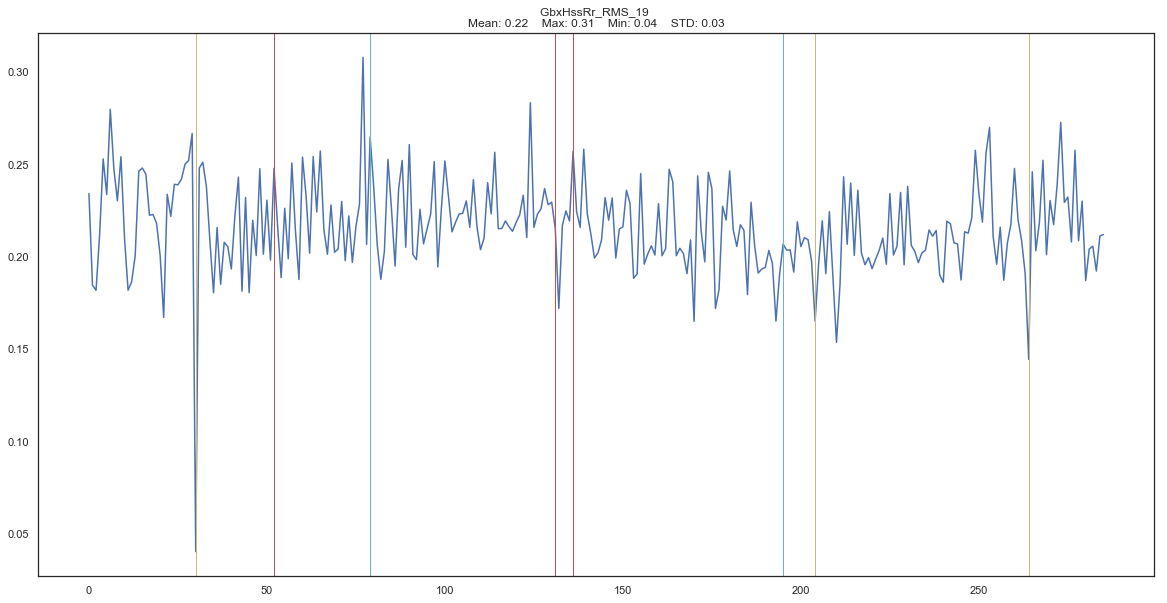

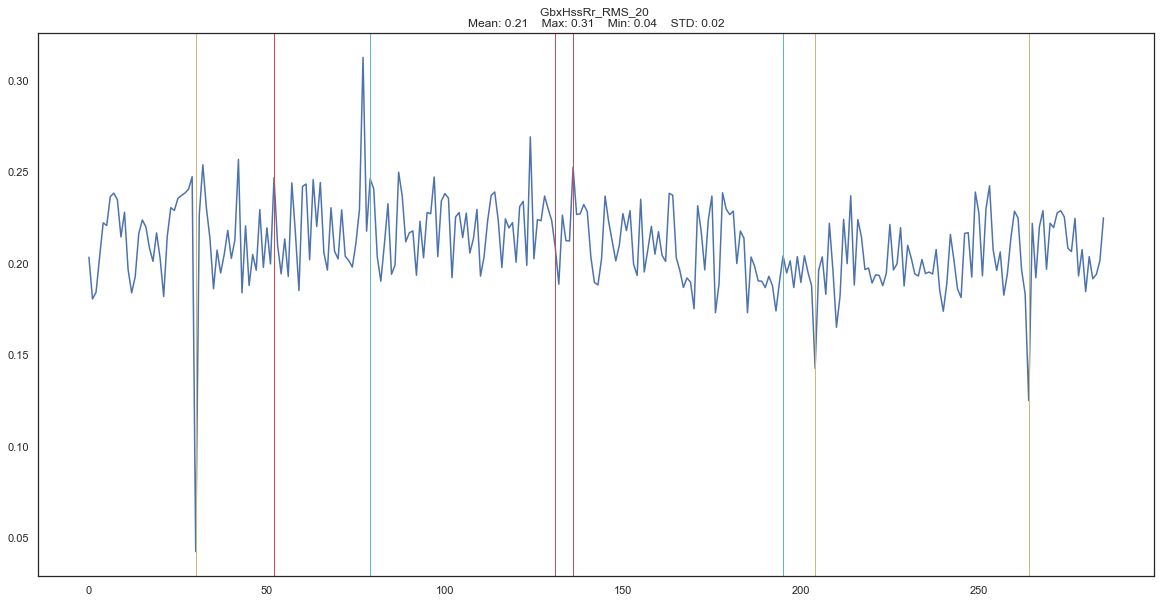

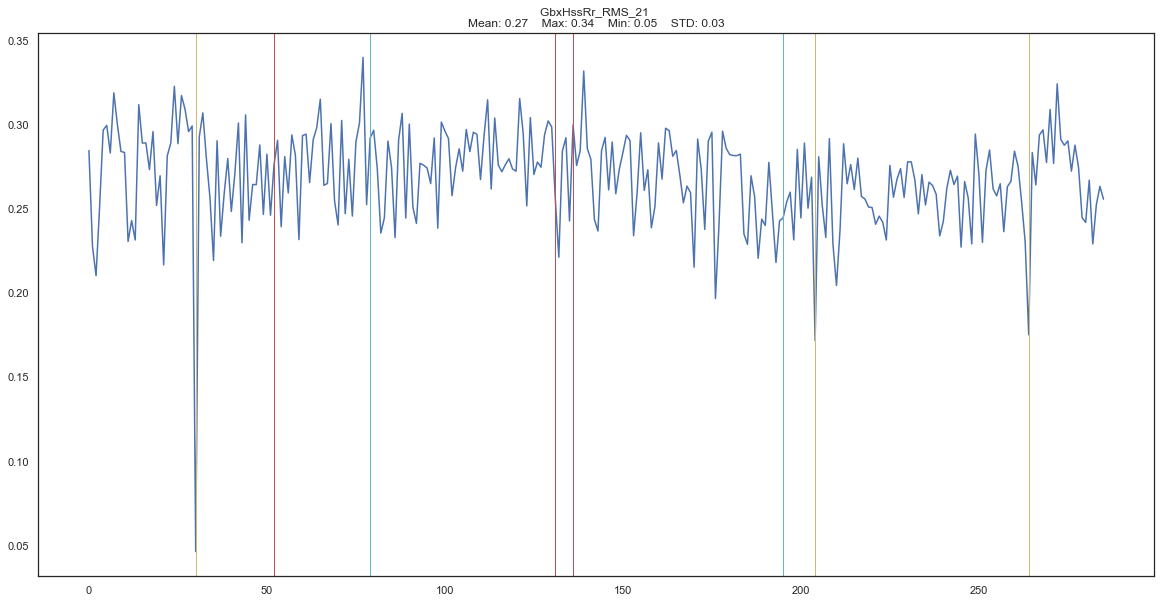

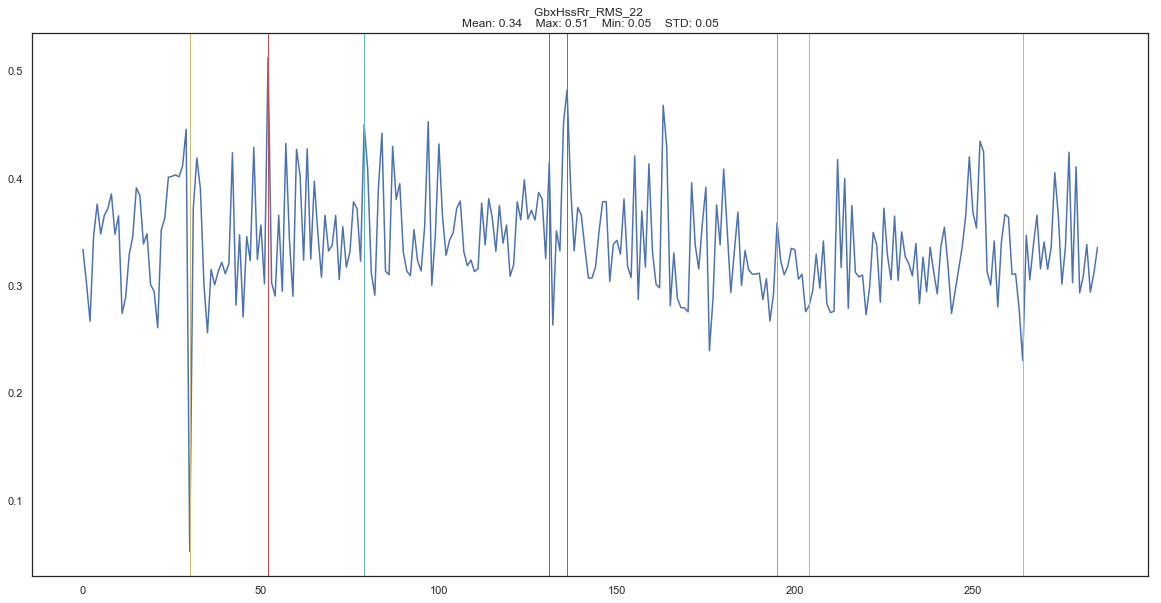

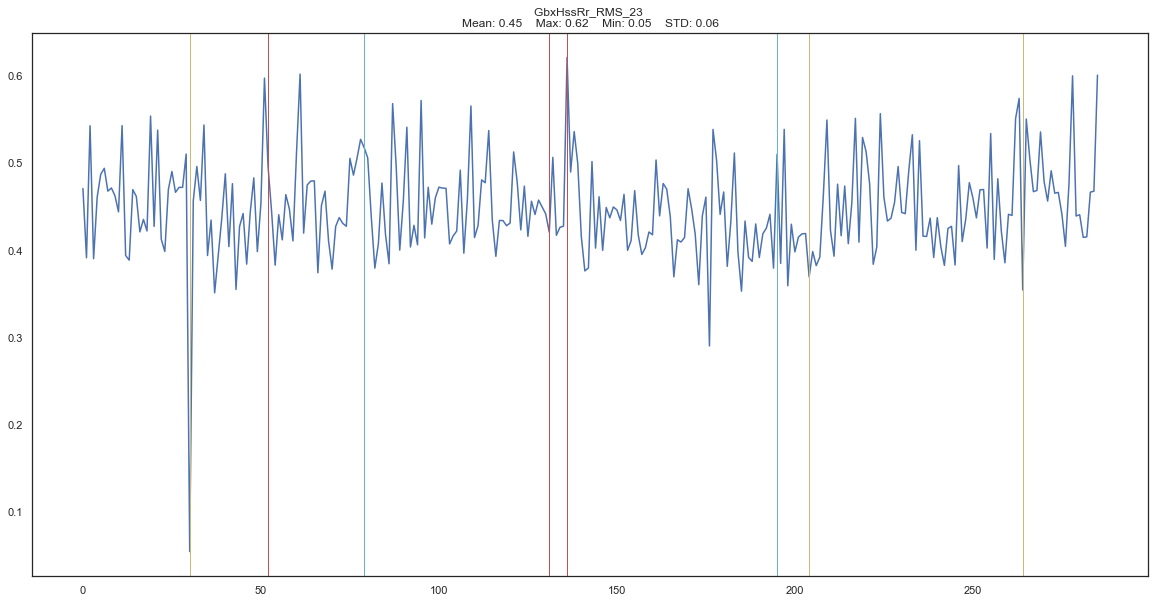

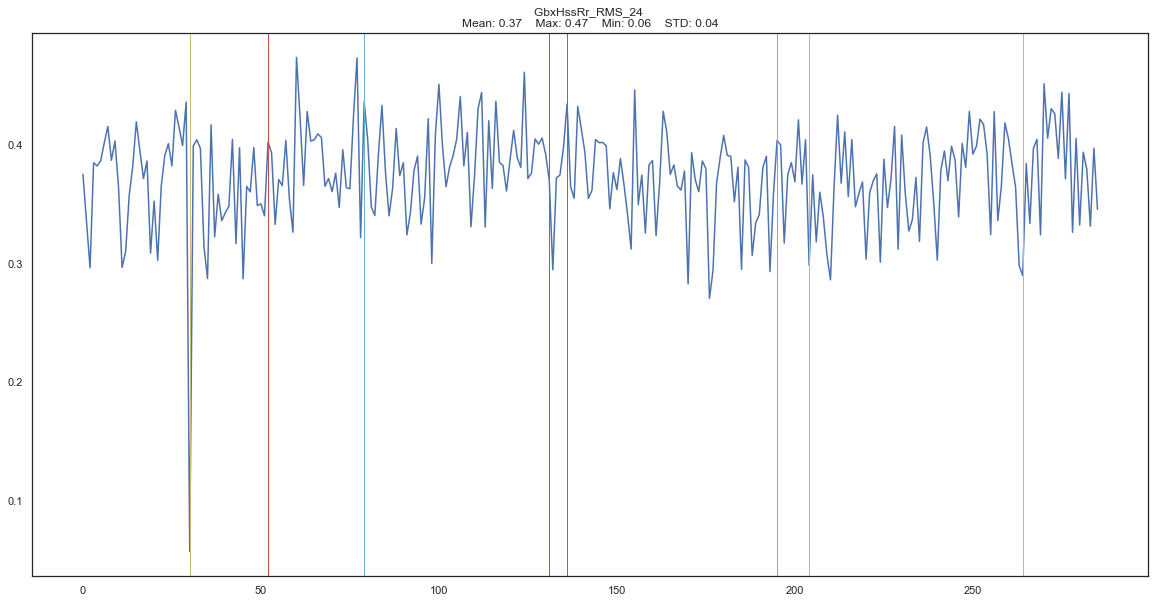

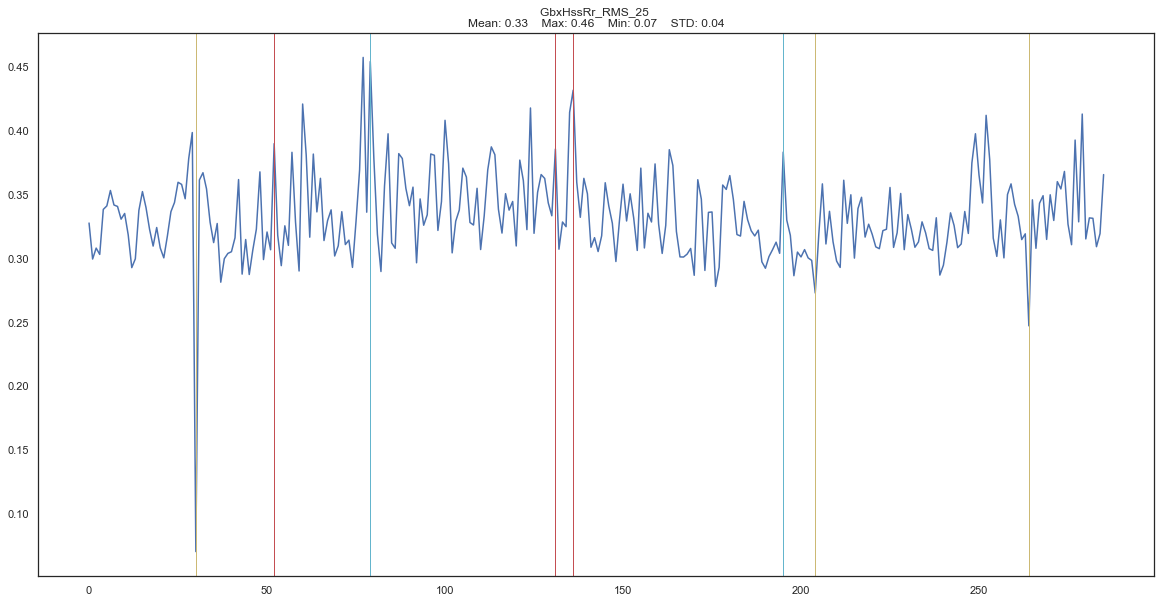

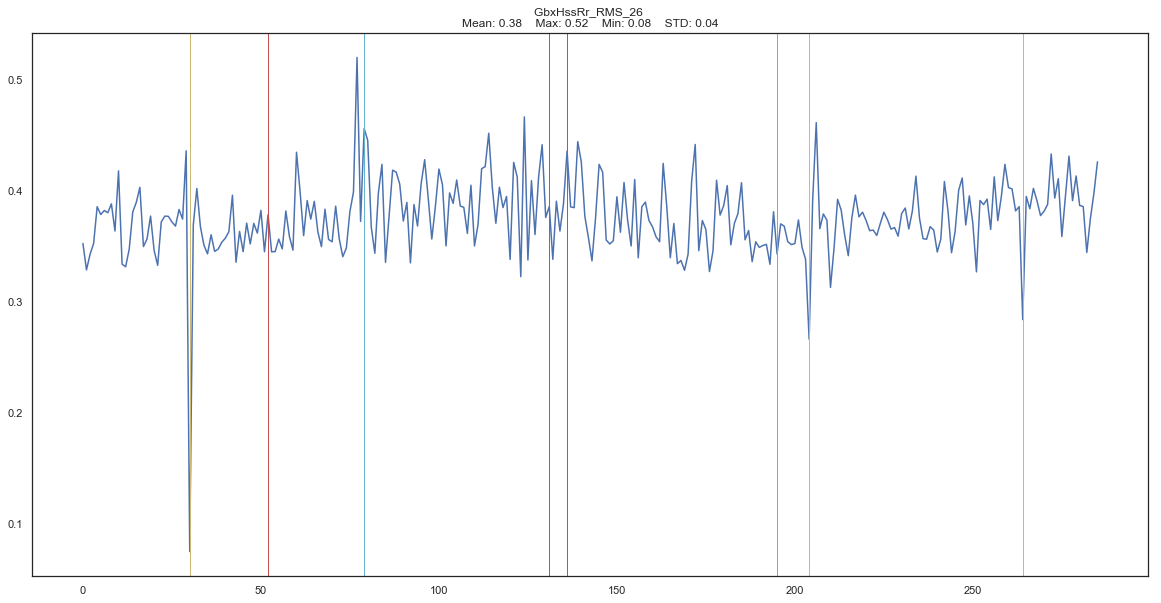

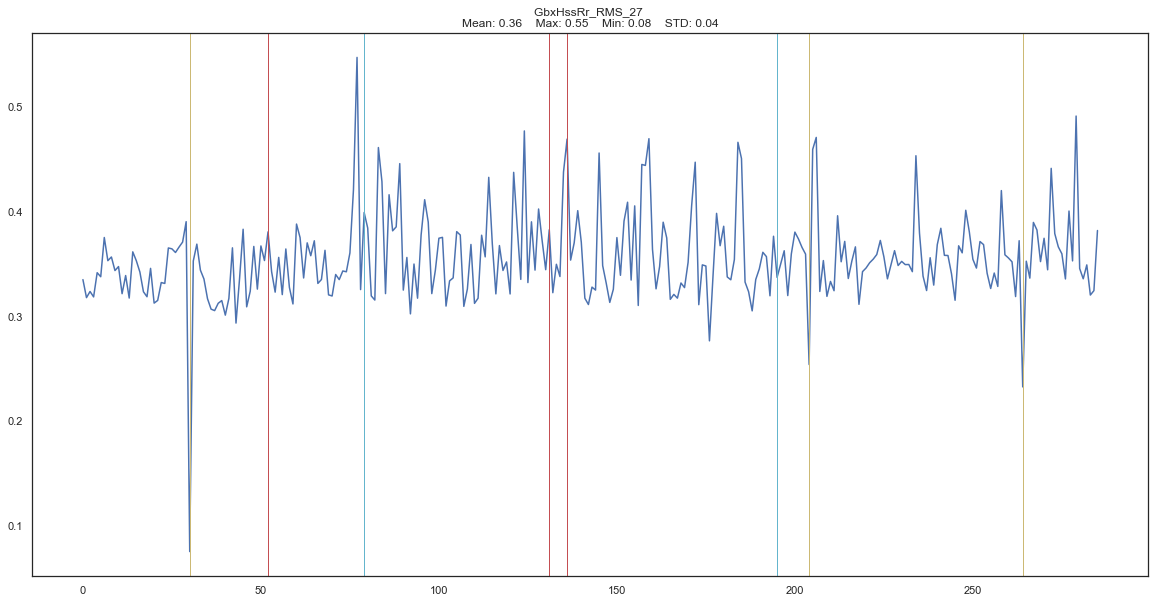

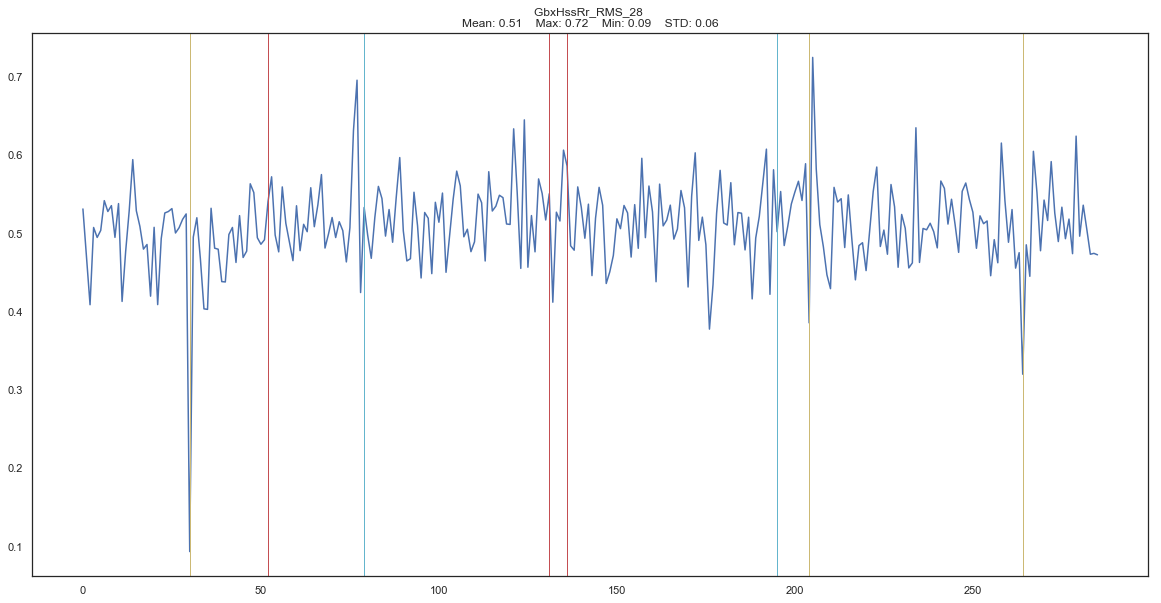

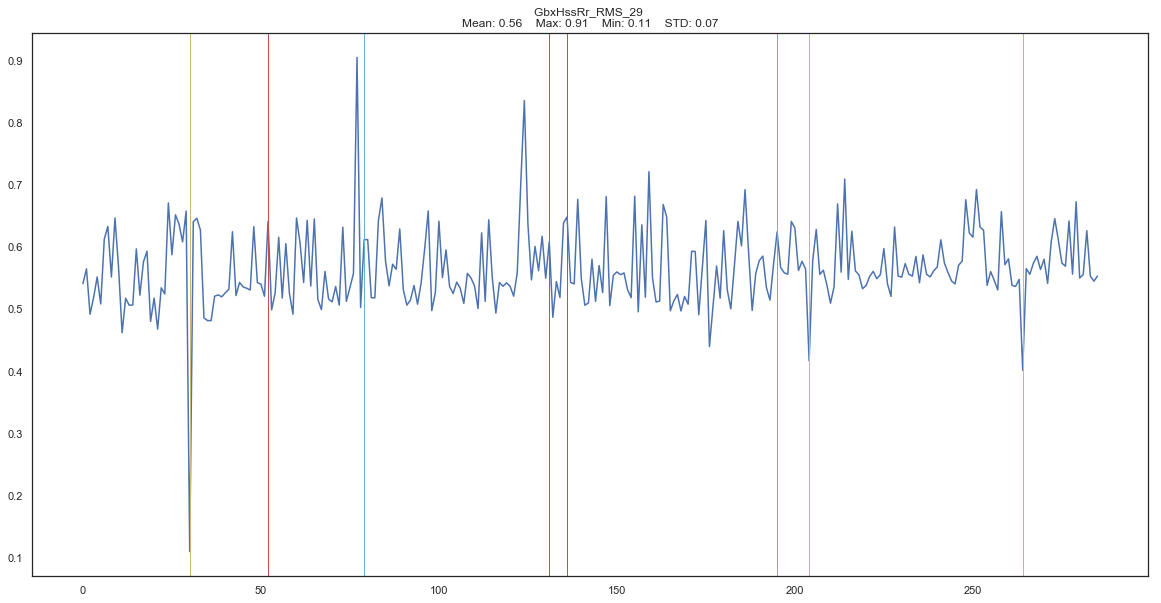

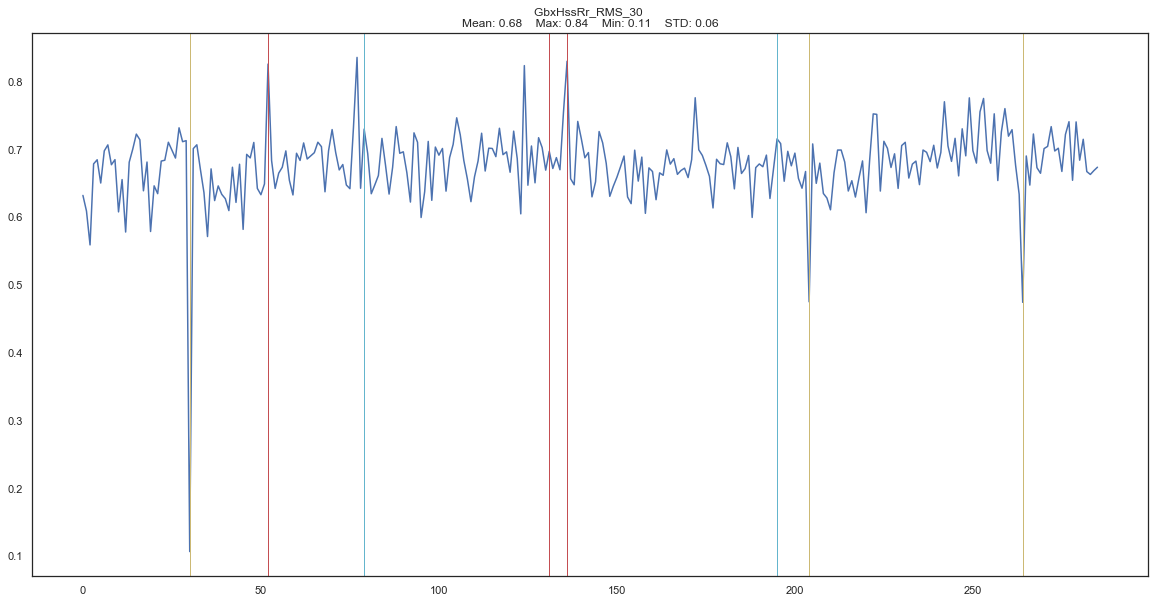

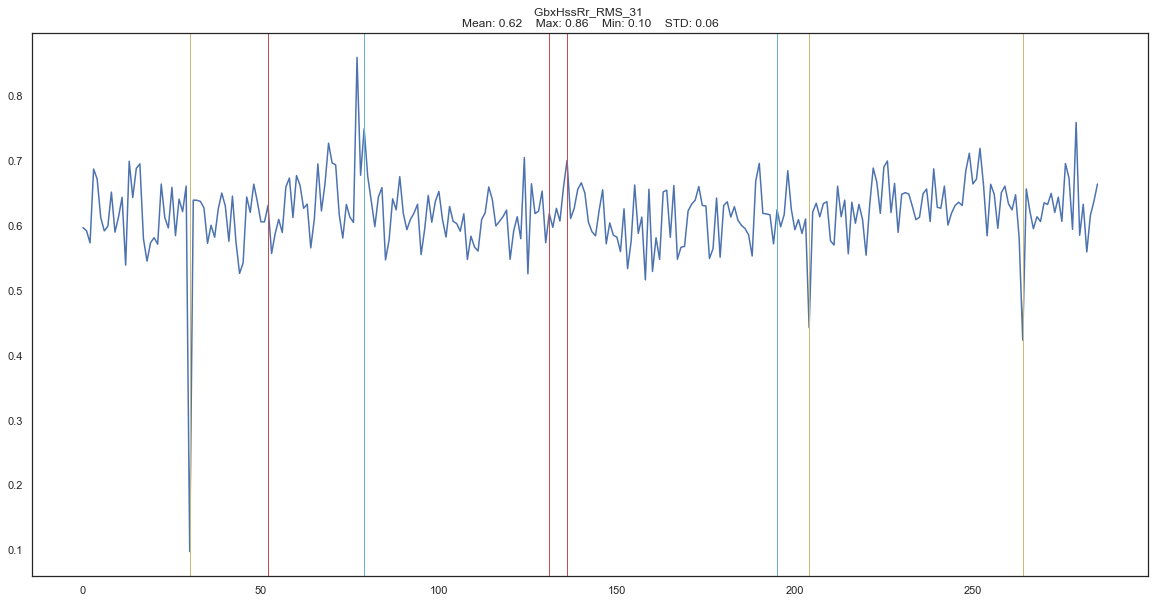

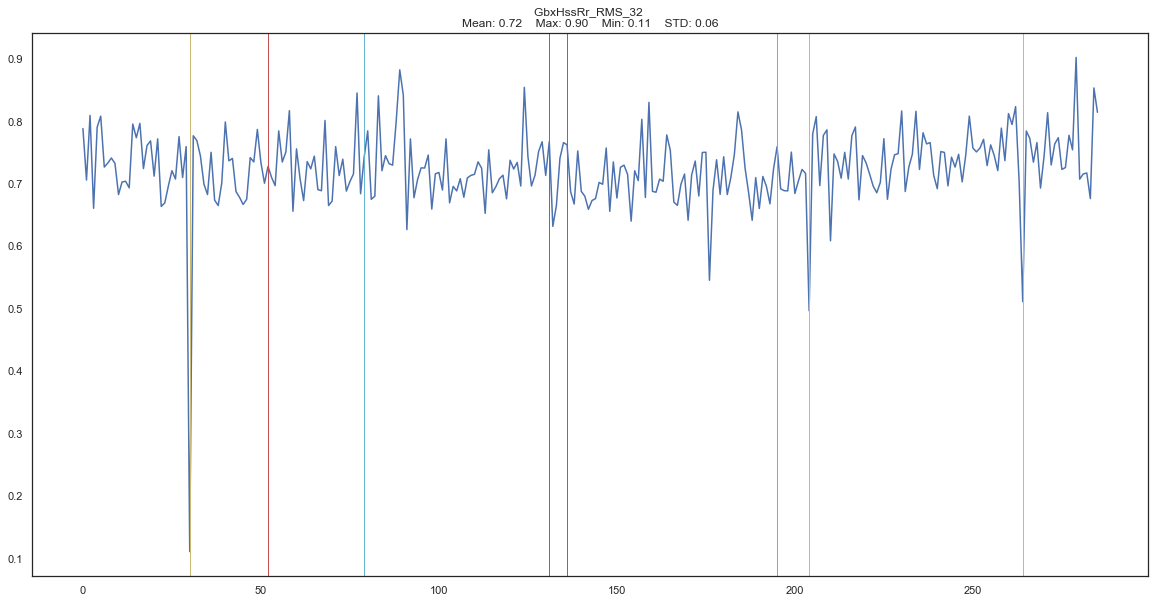

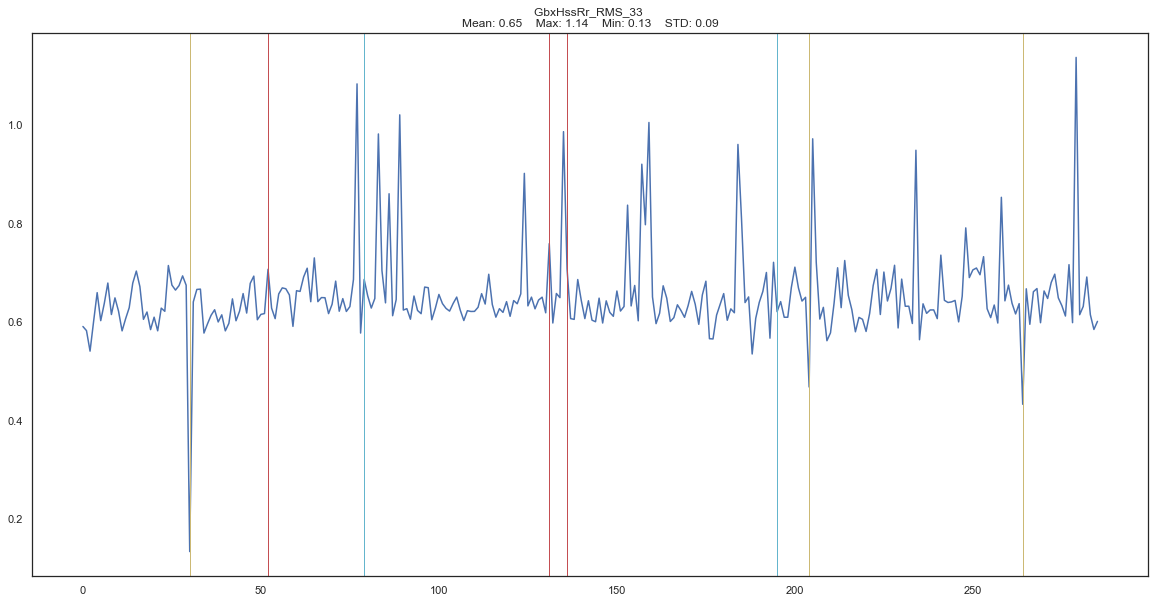

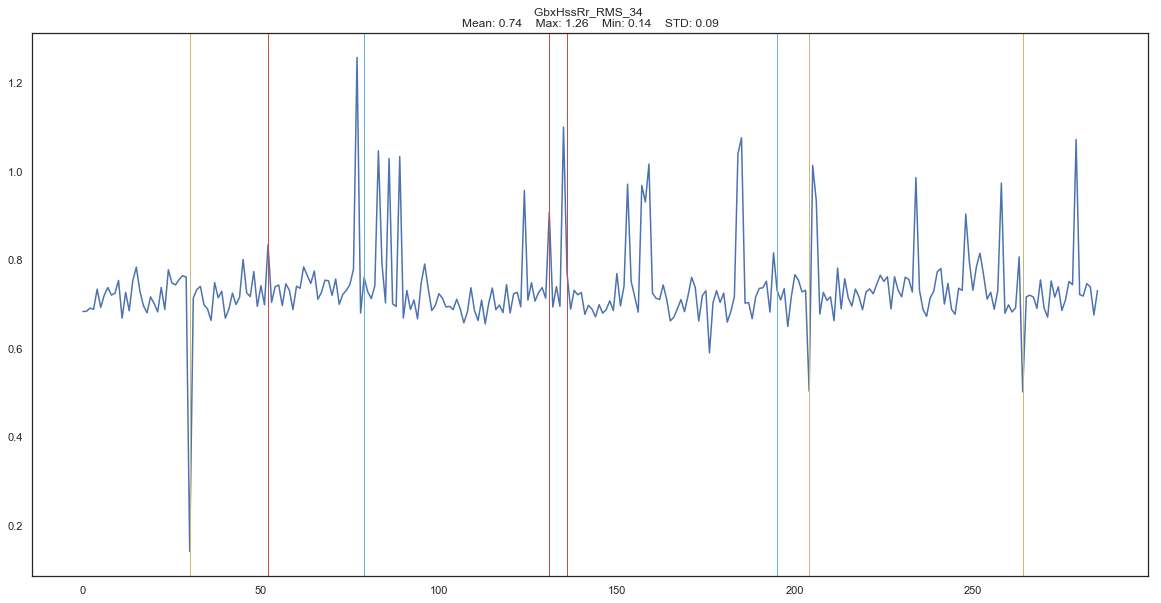

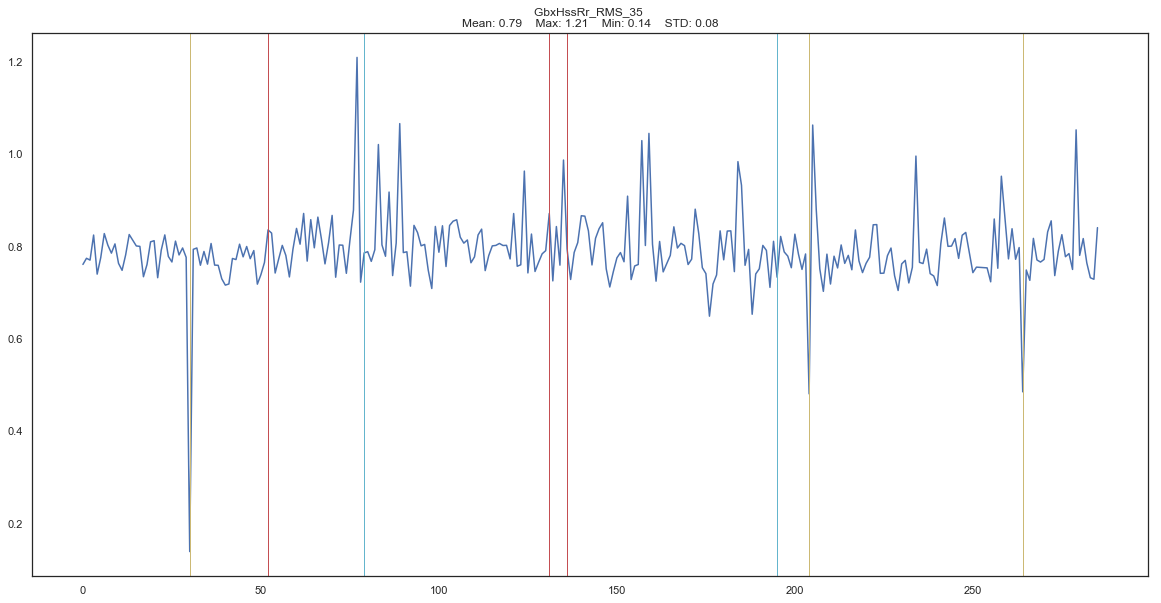

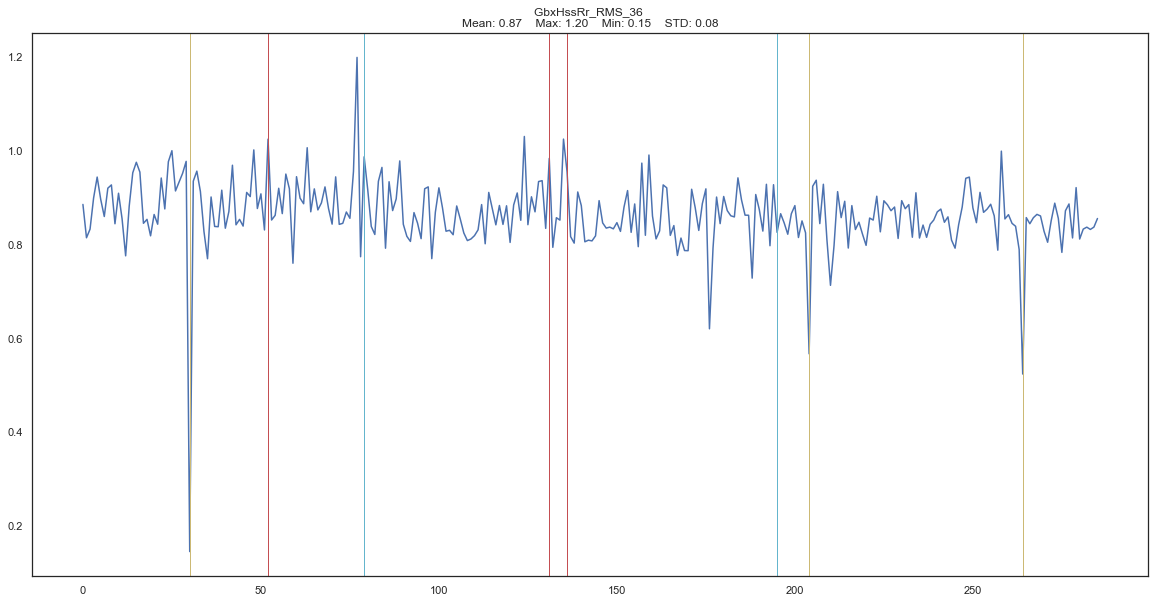

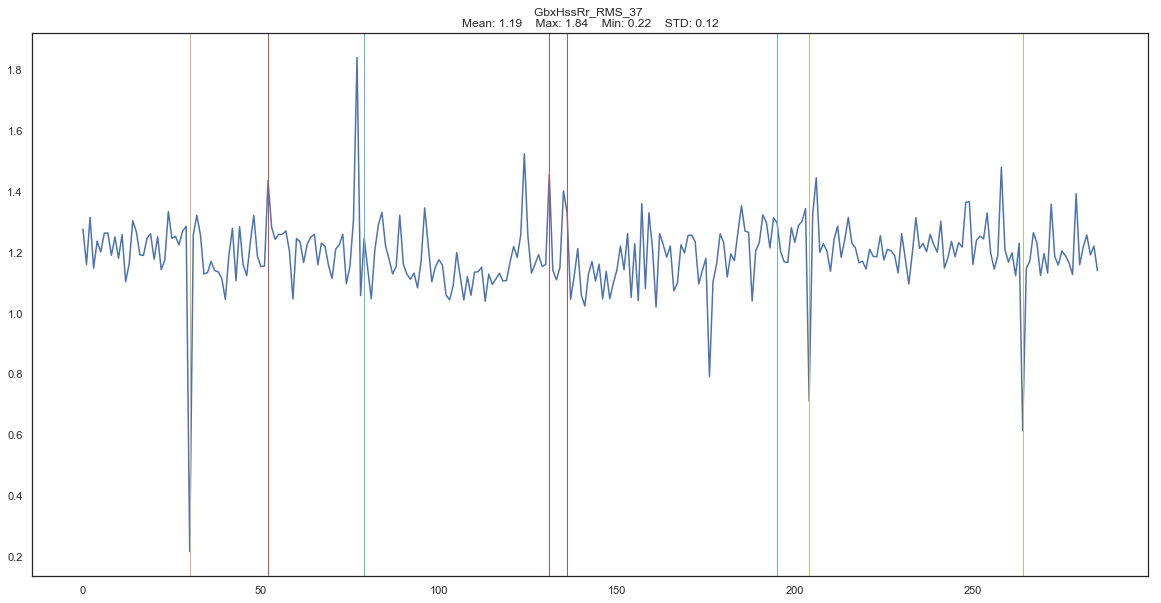

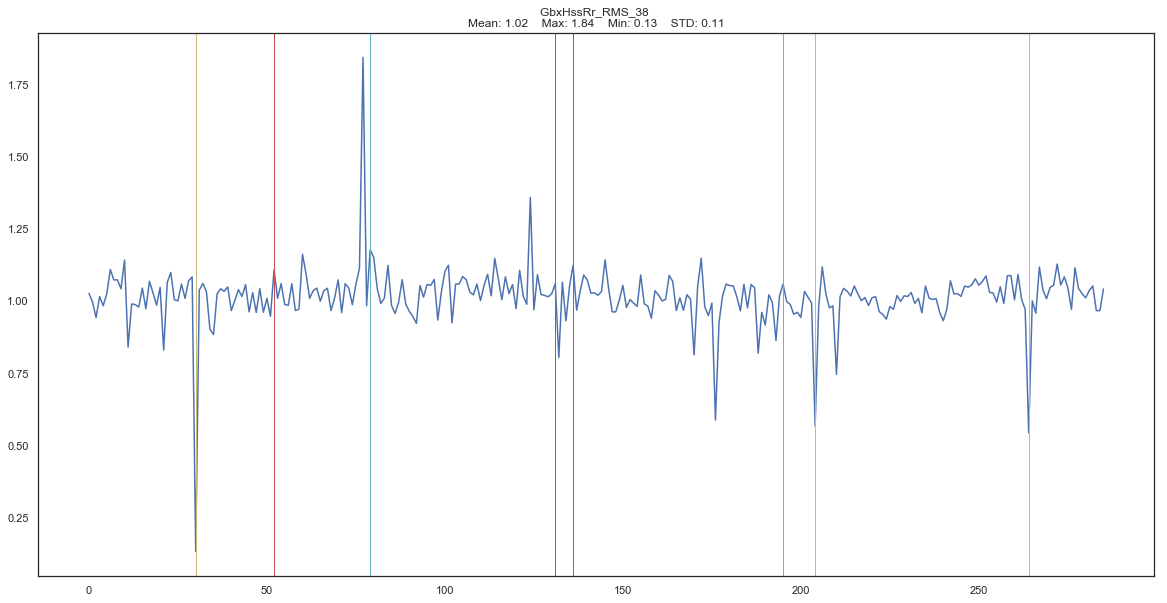

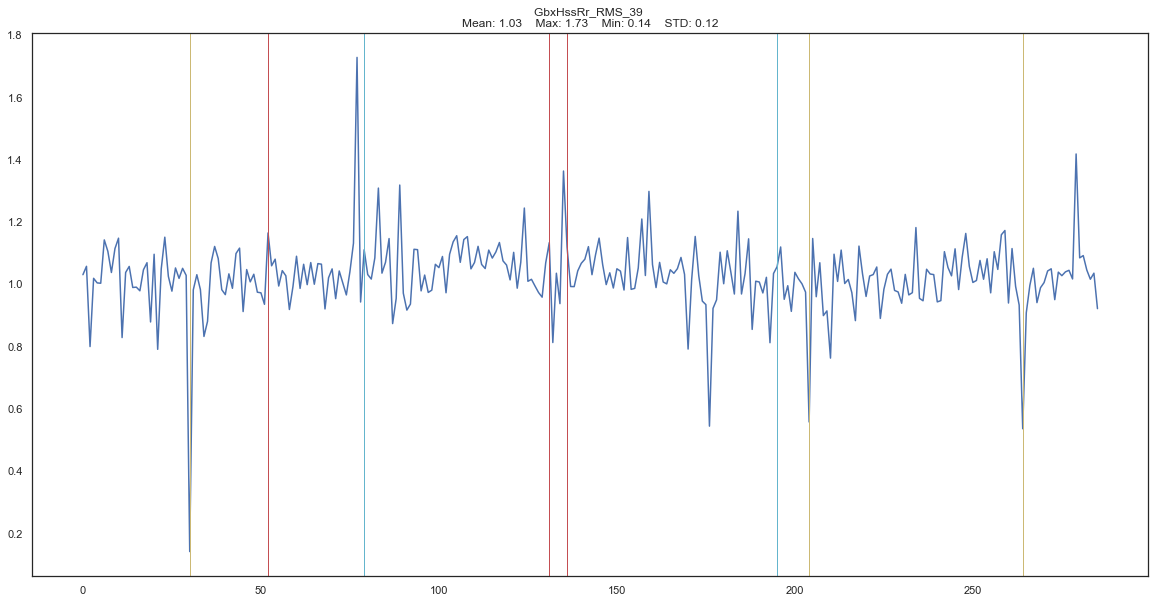

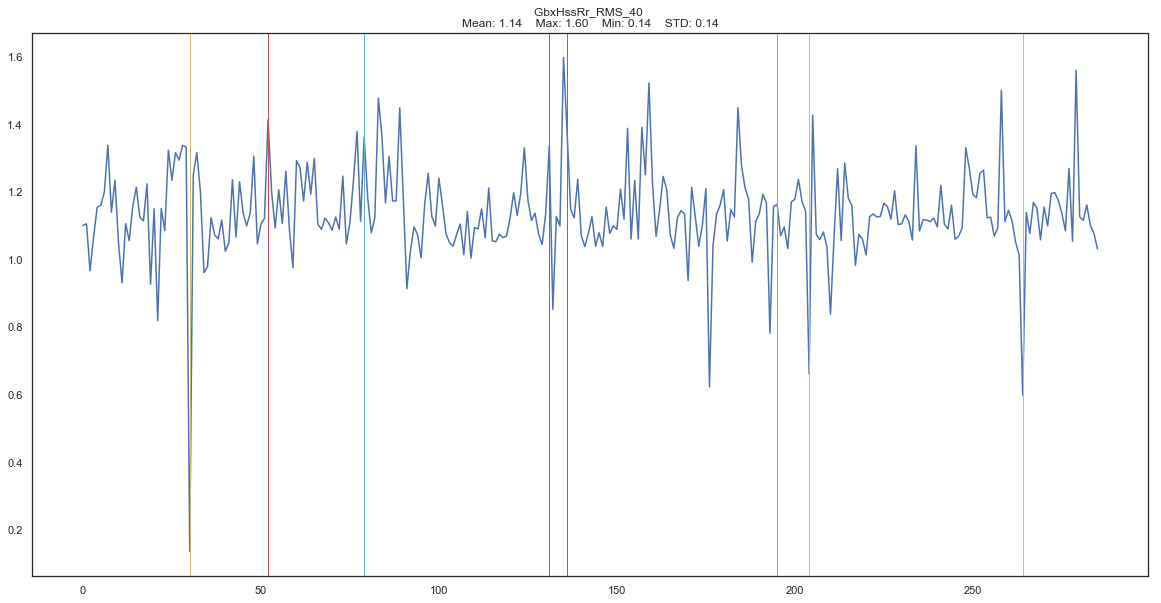

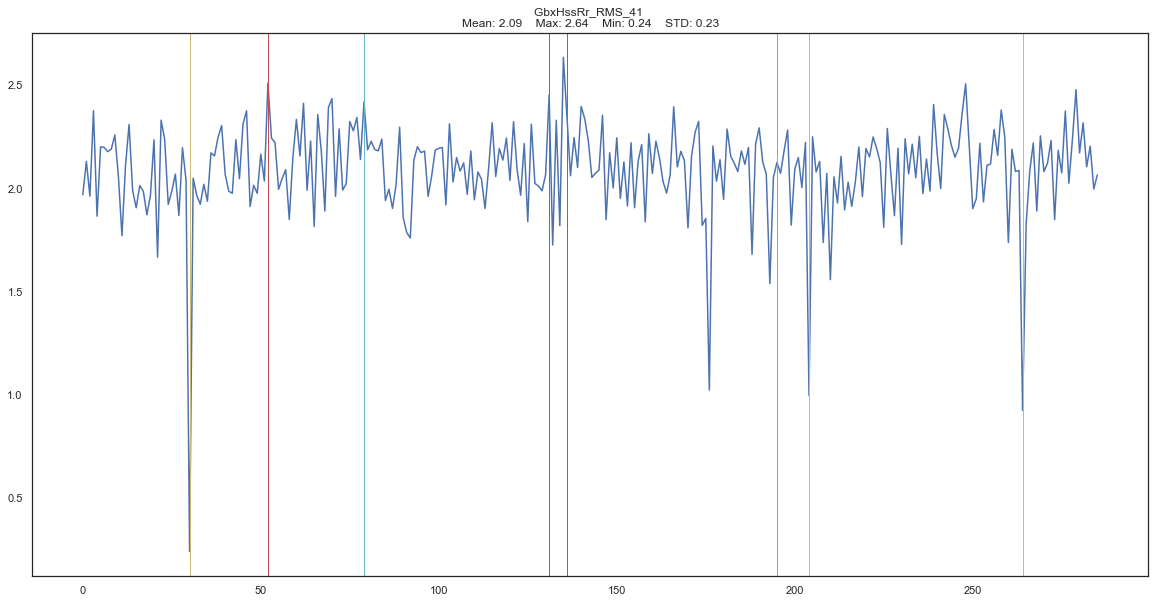

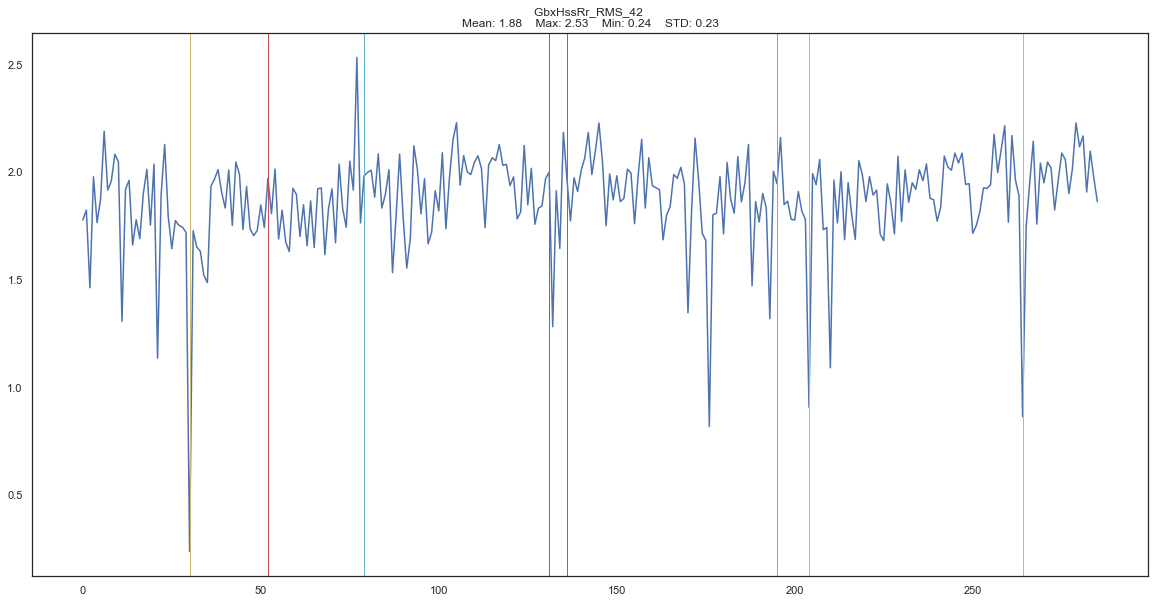

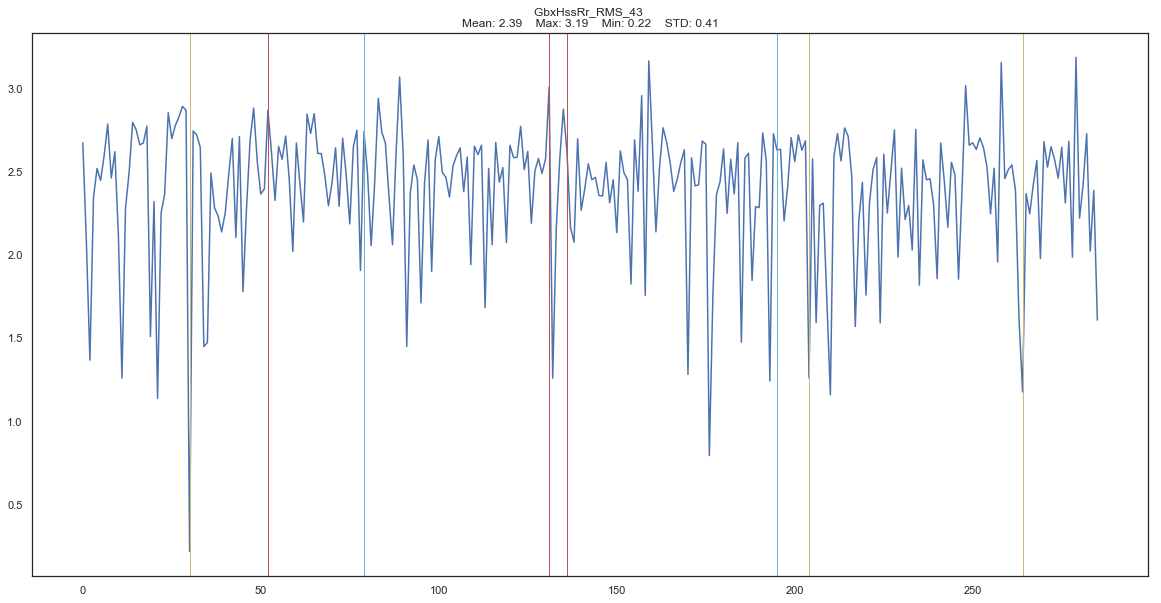

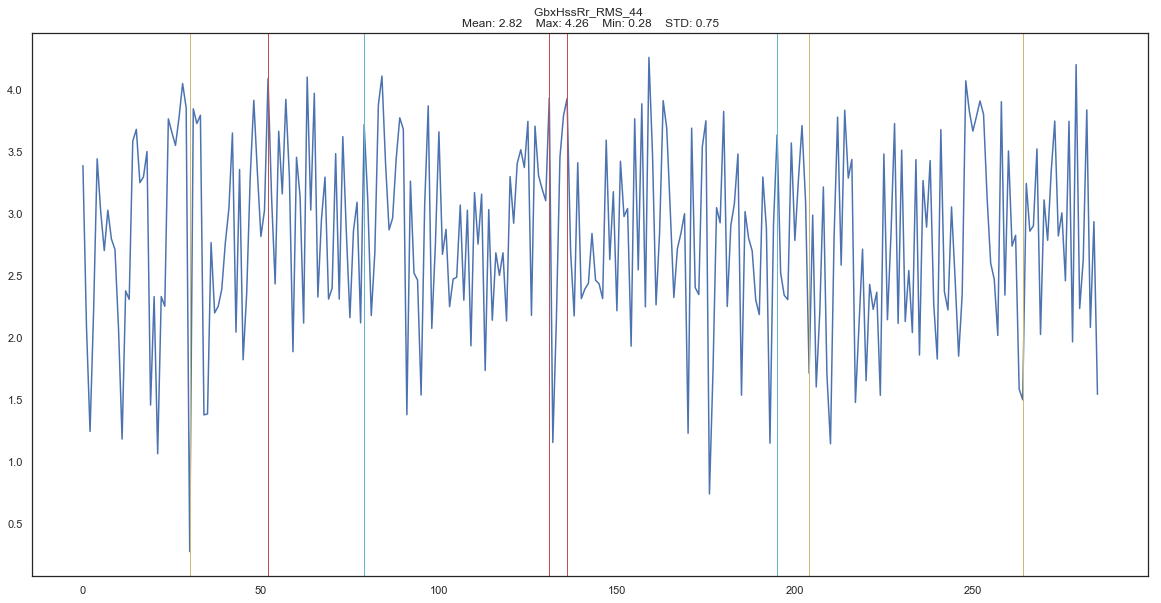

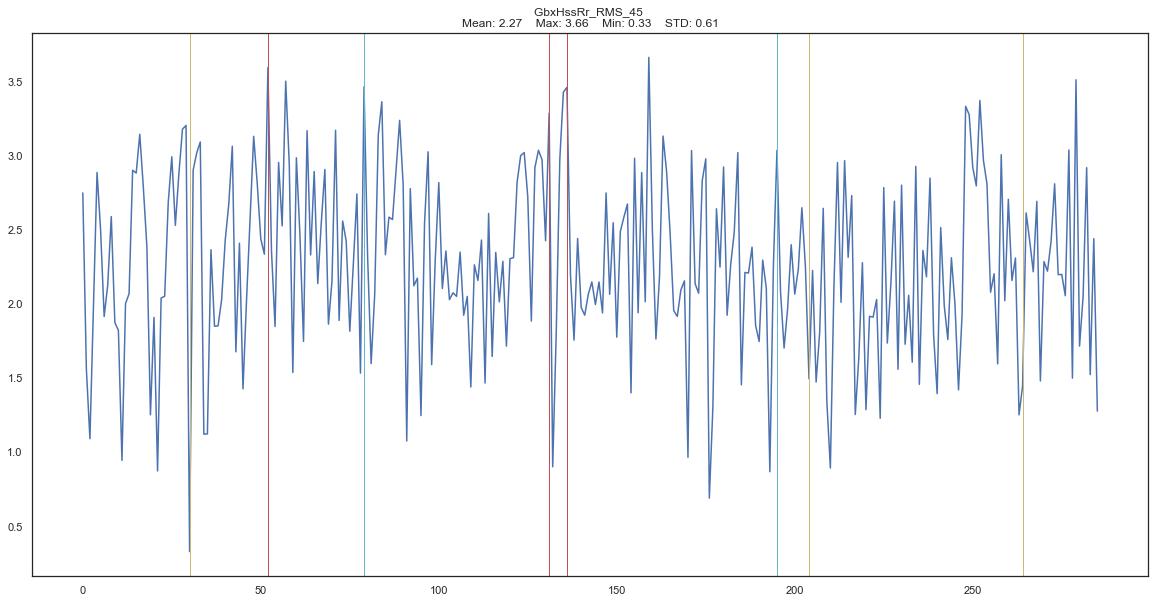

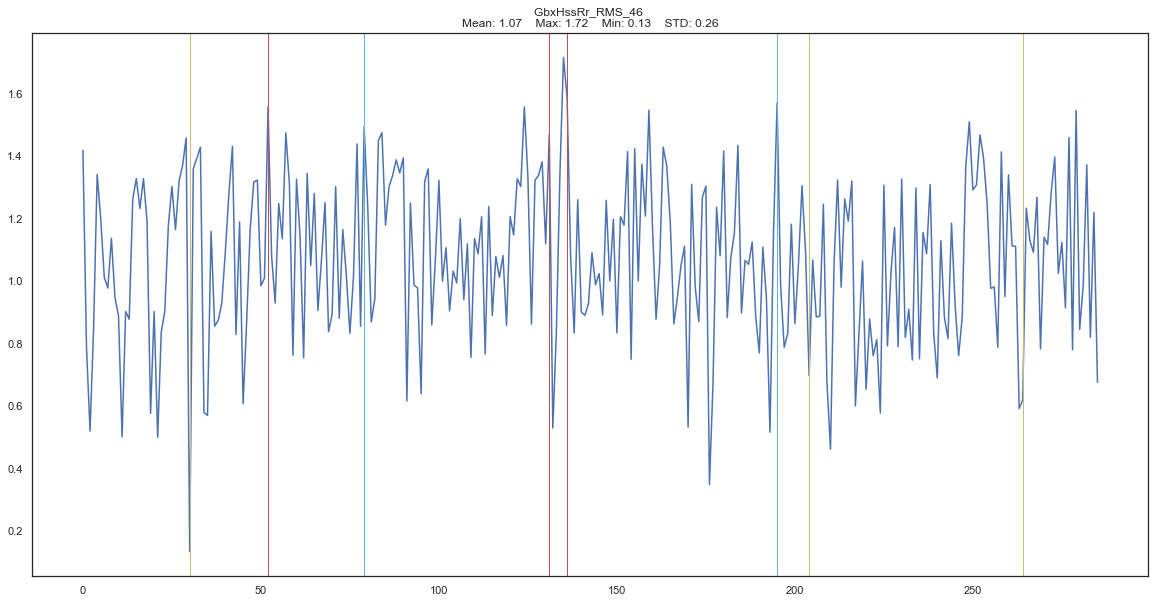

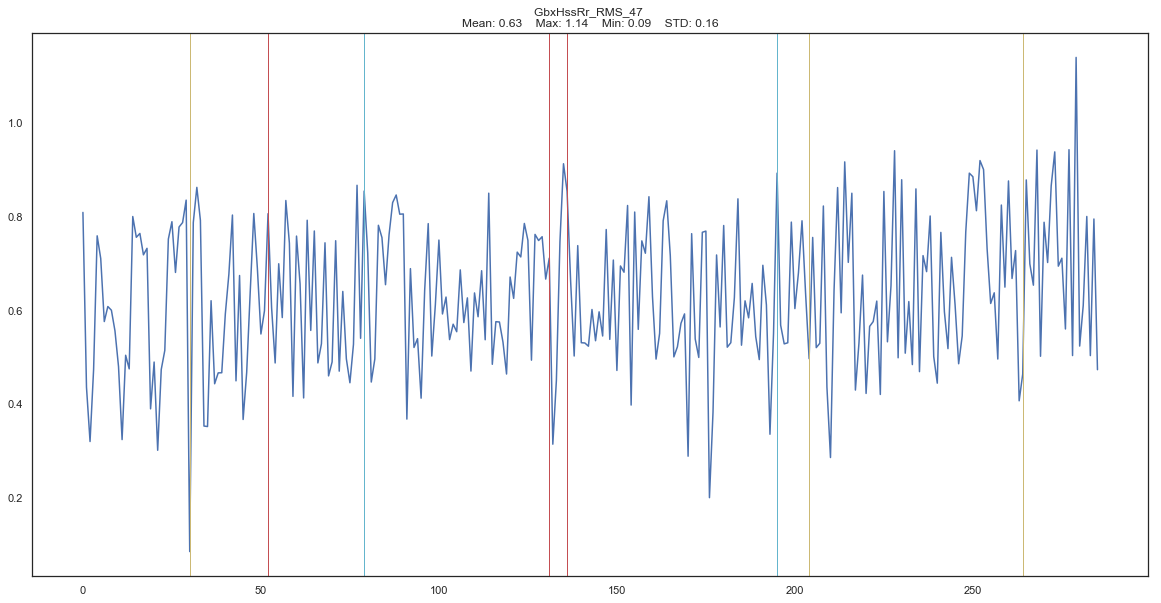

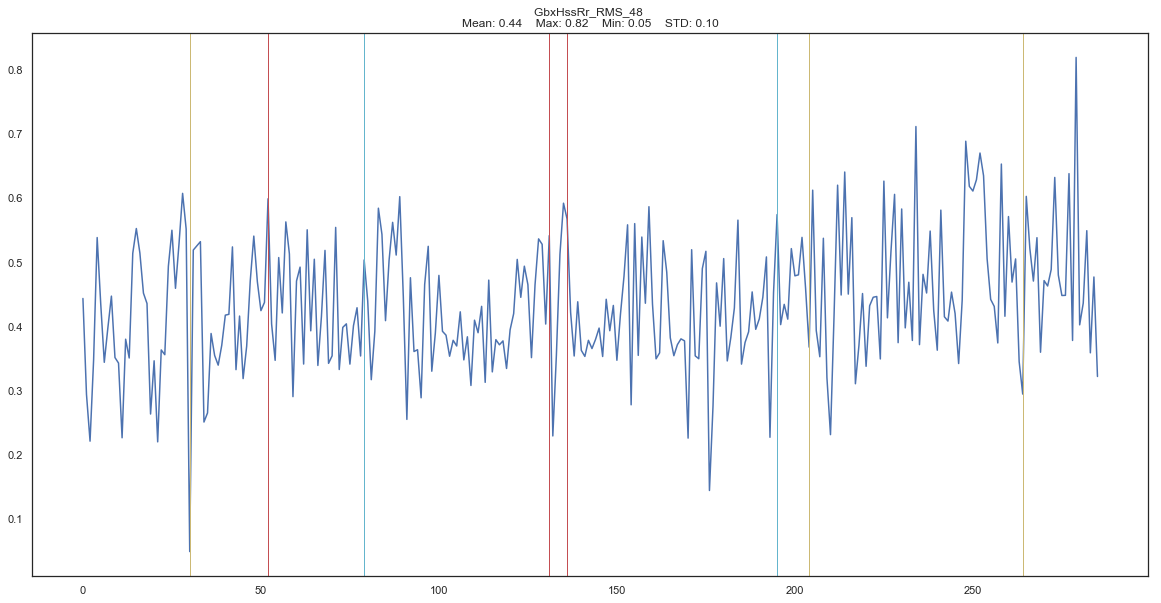

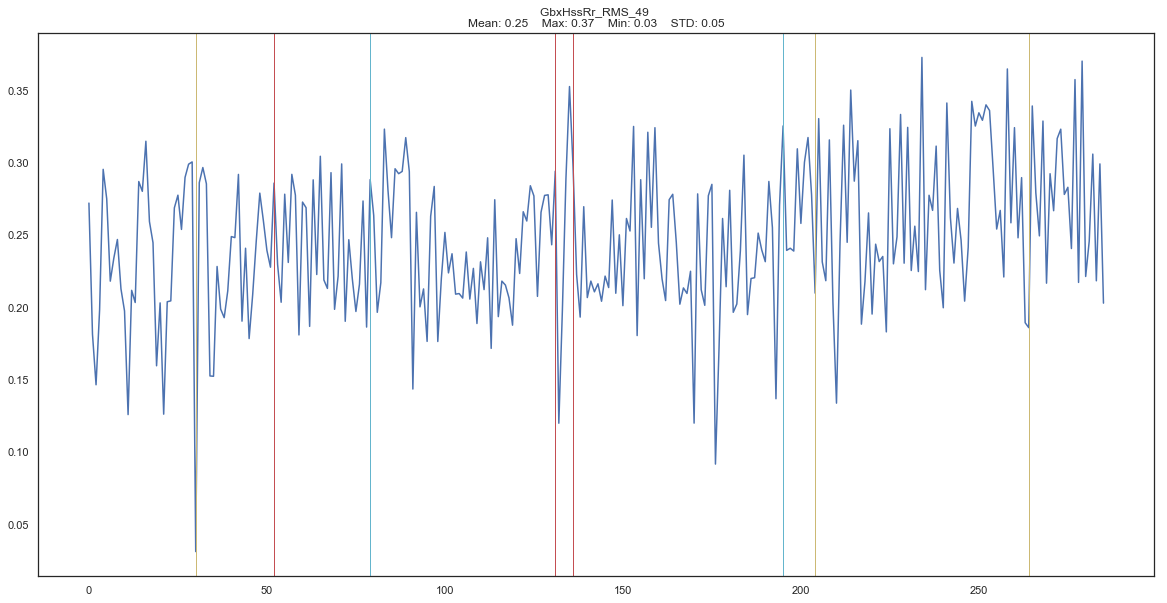

In [9]:
x=np.arange(len(data))
for i, name in enumerate(data.columns):
    plt.figure(figsize=(20,10))
    y = data.values[:,i]
    mean_val = np.mean(y)
    max_val = np.max(y)
    min_val = np.min(y)
    std_val = np.std(y)
    plt.title(f'{name} \nMean: {mean_val:.2f}    Max: {max_val:.2f}    Min: {min_val:.2f}    STD: {std_val:.2f}')
    plt.plot(x, y)
    plt.axvline(x=30,  c='y', linewidth=1)
    plt.axvline(x=52,  c='r', linewidth=1)
    plt.axvline(x=79,  c='c', linewidth=1)
    plt.axvline(x=131, c='r', linewidth=1)
    plt.axvline(x=136, c='r', linewidth=1)
    plt.axvline(x=195, c='c', linewidth=1)
    plt.axvline(x=204, c='y', linewidth=1)
    plt.axvline(x=264, c='y', linewidth=1)
    plt.show()

In [10]:
print('Yellow lines: ')
print(f"AvgPower value at first low rot speed: {data.iloc[30]['AvgPower']}")
print(f"AvgPower value at second low rot speed: {data.iloc[204]['AvgPower']}")
print(f"AvgPower value at third low rot speed: {data.iloc[264]['AvgPower']}")
print('\nRed lines: ')
print(f"AvgPower value at first peak in bin 5: {data.iloc[52]['AvgPower']}")
print(f"AvgPower value at second peak in bin 5: {data.iloc[131]['AvgPower']}")
print(f"AvgPower value at third peak in bin 5: {data.iloc[136]['AvgPower']}")
print('\nBlue lines')
print(f"AvgPower value at second high rot speed: {data.iloc[79]['AvgPower']}")
print(f"AvgPower value at fifth high rot speed: {data.iloc[195]['AvgPower']}")

Yellow lines: 
AvgPower value at first low rot speed: 2693.899658203
AvgPower value at second low rot speed: 2640.591552734
AvgPower value at third low rot speed: 2570.507568359

Red lines: 
AvgPower value at first peak in bin 5: 3315.529296875
AvgPower value at second peak in bin 5: 3258.451660156
AvgPower value at third peak in bin 5: 3279.9111328129998

Blue lines
AvgPower value at second high rot speed: 2556.181640625
AvgPower value at fifth high rot speed: 2588.951660156


In [11]:
%autoreload
import build_dataset

In [12]:
pwr_values = [2693.899658203, 2640.591552734, 2570.507568359,
              3315.529296875, 3258.451660156, 3279.911132813,
              2556.181640625, 2588.951660156]

46


../data_processing/ff_transform.py:204: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  amp = fft_modulus_norm[filter_indexes]


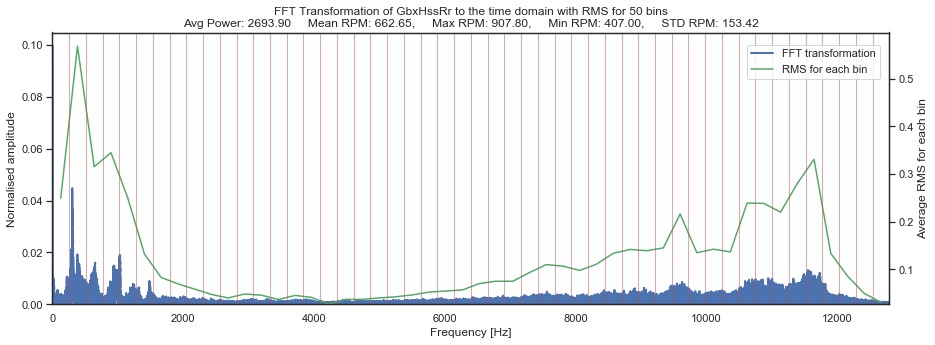

75


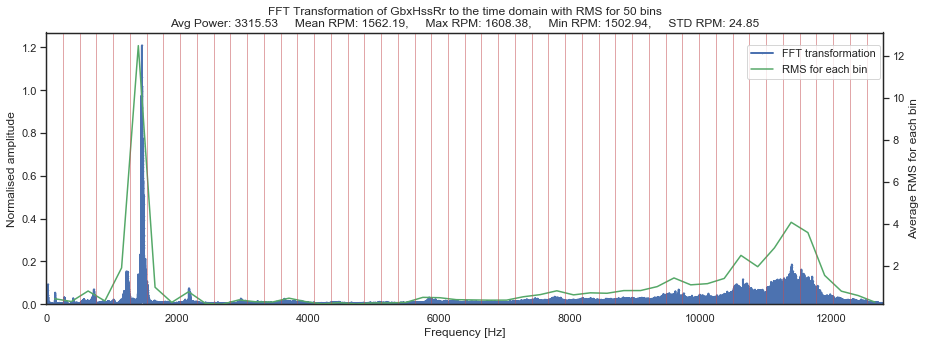

116


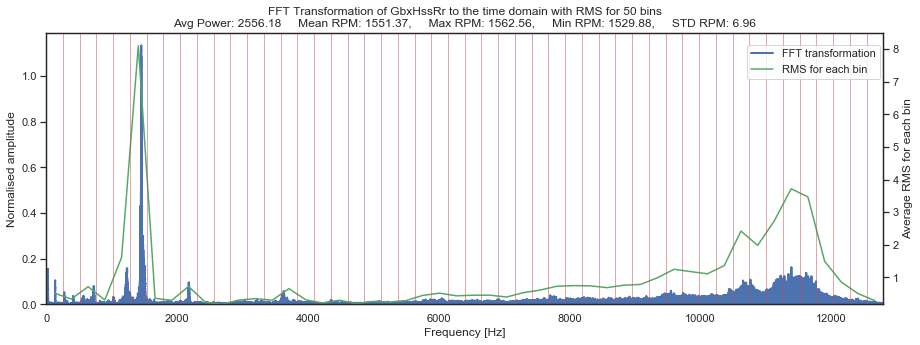

190


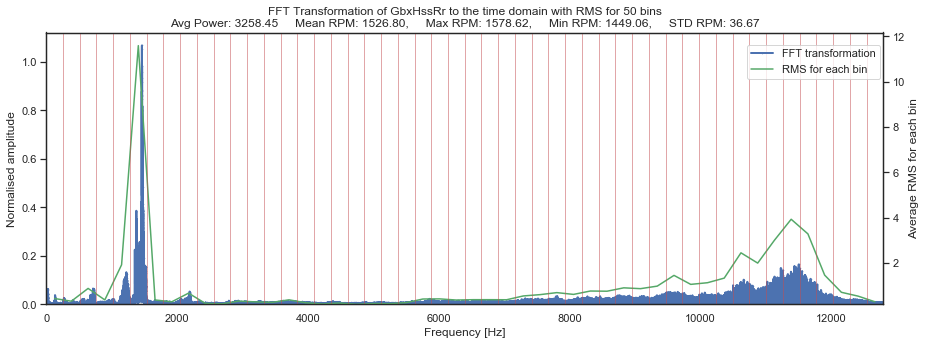

197


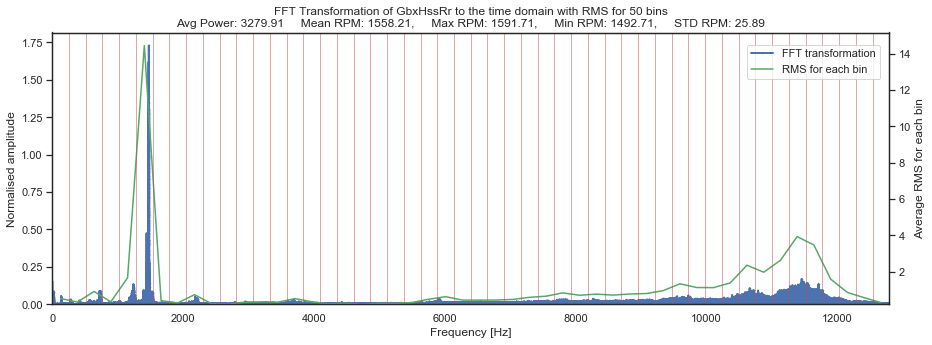

286


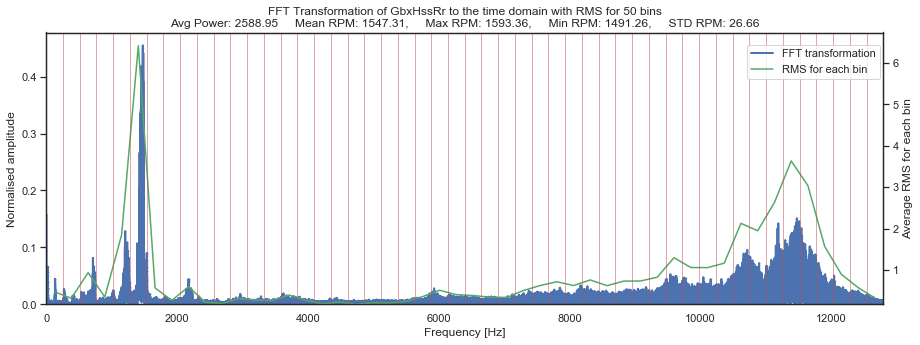

300


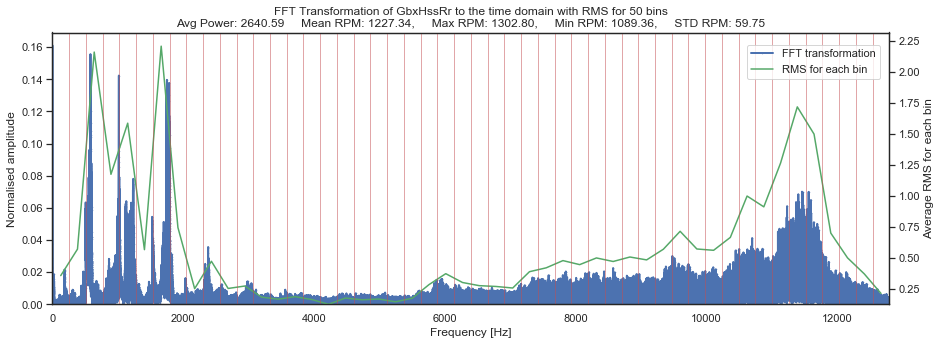

392


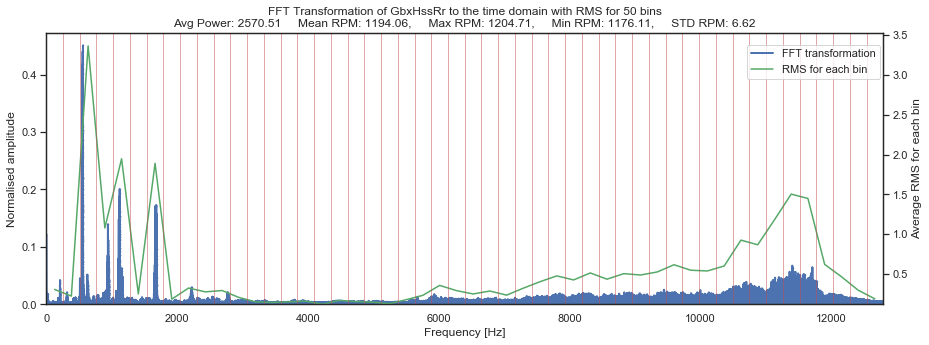

8 / 425 intervals added to dataframe


In [13]:
df = build_dataset.create_rms_datasets_for_one_component(wt_instance, 'GbxHssRr;0,0102;m/s2', 
                                                         power_threshold=2500,plot=True, bins=50, 
                                                         plot_vertical_lines=True,
                                                         avg_pwr_values = pwr_values)

### Generate fake datapoints

In [240]:
rand_arr = np.random.rand(1,50)*3
rand_arr = rand_arr[0]
rand_arr

array([1.84496256, 1.23252376, 0.95425893, 2.79230947, 2.62215051,
       1.04383648, 1.39607189, 0.89460616, 0.89507125, 1.76218305,
       2.9364891 , 0.23163563, 0.34292712, 0.11624545, 0.52203639,
       2.16528667, 0.2538581 , 2.22066698, 2.1745783 , 2.23233306,
       0.705924  , 0.26966446, 1.38947777, 2.38941077, 0.9034115 ,
       1.56097441, 1.65983693, 0.51489862, 2.03518683, 0.03686644,
       1.0502354 , 1.34880355, 0.18435588, 0.35506628, 0.1455642 ,
       0.31629432, 0.49124721, 0.26354678, 1.6873406 , 1.40299251,
       1.2698955 , 1.34066387, 1.83203909, 2.92539167, 0.75212   ,
       1.2836731 , 0.31341939, 1.98067554, 0.06978032, 2.82239538])

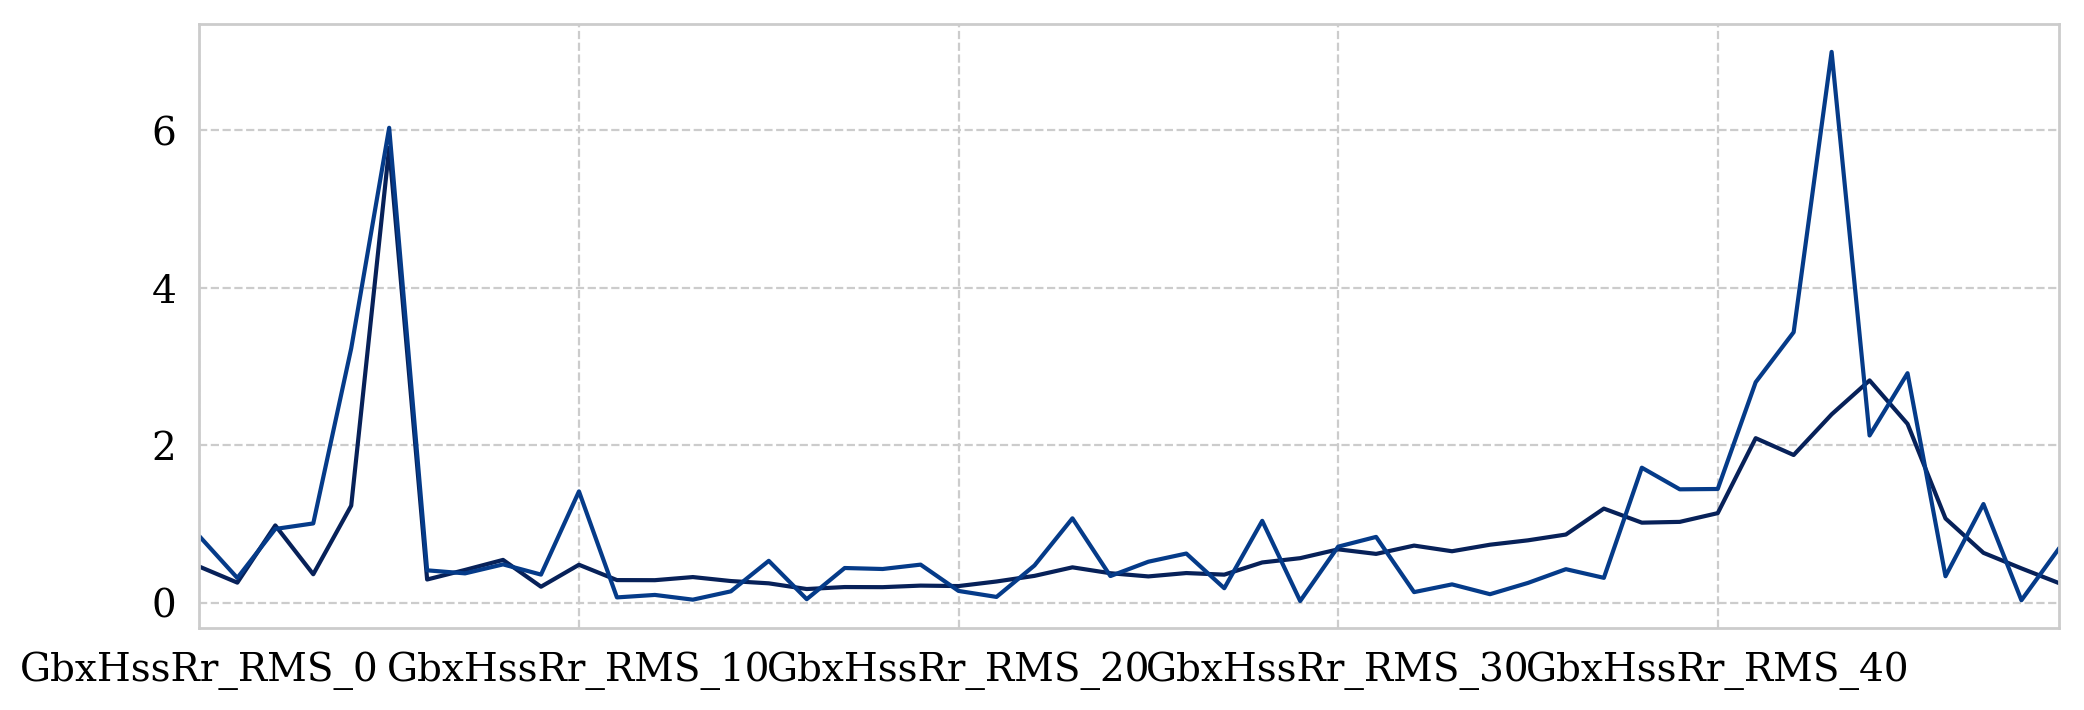

In [242]:
fake2 = data.drop(columns=['AvgPower','ActPower','AvgRotSpeed','WindSpeed','NacelleDirection']).mean()
fake2.plot()

fake3 = ((fake2 ).multiply(rand_arr) )
fake3.plot()
#(fake2+2).plot()

In [29]:
fake = pd.DataFrame(np.array(data.mean()).reshape(-1, data.shape[1]), columns=data.columns)
fake

AvgPower    ActPower  AvgRotSpeed  WindSpeed  NacelleDirection  \
0  2810.722013  2729.28777  1469.740586  11.248252        194.115734   

   GbxHssRr_RMS_0  GbxHssRr_RMS_1  GbxHssRr_RMS_2  GbxHssRr_RMS_3  \
0        0.457509         0.25432        0.981178        0.360376   

   GbxHssRr_RMS_4  ...  GbxHssRr_RMS_40  GbxHssRr_RMS_41  GbxHssRr_RMS_42  \
0        1.232012  ...         1.137108         2.089491          1.87575   

   GbxHssRr_RMS_43  GbxHssRr_RMS_44  GbxHssRr_RMS_45  GbxHssRr_RMS_46  \
0         2.392073         2.823761         2.271125         1.069254   

   GbxHssRr_RMS_47  GbxHssRr_RMS_48  GbxHssRr_RMS_49  
0         0.632511         0.435221          0.24616  

[1 rows x 55 columns]

In [30]:
fake.drop(columns=['AvgPower','ActPower','AvgRotSpeed','WindSpeed','NacelleDirection'])

GbxHssRr_RMS_0  GbxHssRr_RMS_1  GbxHssRr_RMS_2  GbxHssRr_RMS_3  \
0        0.457509         0.25432        0.981178        0.360376   

   GbxHssRr_RMS_4  GbxHssRr_RMS_5  GbxHssRr_RMS_6  GbxHssRr_RMS_7  \
0        1.232012        5.780002        0.293921        0.415587   

   GbxHssRr_RMS_8  GbxHssRr_RMS_9  ...  GbxHssRr_RMS_40  GbxHssRr_RMS_41  \
0        0.542896        0.202149  ...         1.137108         2.089491   

   GbxHssRr_RMS_42  GbxHssRr_RMS_43  GbxHssRr_RMS_44  GbxHssRr_RMS_45  \
0          1.87575         2.392073         2.823761         2.271125   

   GbxHssRr_RMS_46  GbxHssRr_RMS_47  GbxHssRr_RMS_48  GbxHssRr_RMS_49  
0         1.069254         0.632511         0.435221          0.24616  

[1 rows x 50 columns]